In [1]:
import itertools
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

from bs4 import BeautifulSoup
from collections import Counter
from itertools import chain
from pandas.io.json import json_normalize
from pprint import pprint
from recipe_scrapers import scrape_me
from pymongo import MongoClient
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, ElementNotInteractableException
from selenium.common.exceptions import ElementNotVisibleException, StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from tqdm import tqdm_notebook as tqdm

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

In [6]:
import pandas as pd
import numpy as np
import unicodedata
import nltk
import seaborn as sns
from bs4 import BeautifulSoup
import urllib
from string import ascii_lowercase
from nltk.stem import WordNetLemmatizer
from collections import Counter
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
import operator
# import pattern.en as en
from bs4 import BeautifulSoup
# import urllib2
import matplotlib.pyplot as plt
from collections import Counter
from string import ascii_lowercase
import unicodedata
import nltk
import re
from nltk.stem import PorterStemmer
from gensim.models import word2vec
from sklearn import manifold
import itertools
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim import models
from gensim import similarities
import heapq

In [357]:
df = pd.read_csv(r'/Users/stephaniekendall/Desktop/Errthang/Flatiron/projects/FP_Practice/final.csv')
df.head()

,name,ingredients,total_time,avg_rating,ings_cleaned,ings_str,ings_str1,cleaned_ings,text,final,txt,calories_g,fat_g,carbohydrates_g,protein_g,cholesterol_mg,sodium_mg,try,finally
0,World's Best Lasagna,"['1 pound sweet Italian sausage', '3/4 pound lean ground beef', '1/2 cup minced onion', '2 cloves garlic, crushed', '1 (28 ounce) can crushed tomatoes', '2 (6 ounce) cans tomato paste', '2 (6.5 ounce) cans canned tomato sauce', '1/2 cup water', '2 tablespoons white sugar', '1 1/2 teaspoons dried basil leaves', '1/2 teaspoon fennel seeds', '1 teaspoon Italian seasoning', '1 1/2 teaspoons salt, divided, or to taste', '1/4 teaspoon ground black pepper', '4 tablespoons chopped fresh parsley', '12 lasagna noodles', '16 ounces ricotta cheese', '1 egg', '3/4 pound mozzarella cheese, sliced', '3/4 cup grated Parmesan cheese']",195.0,4.80,"['sweet Italian sausage', 'lean ground beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",sweet Italian sausage lean ground beef onion garlic tomatoes tomato paste tomato sauce water white sugar basil leaves fennel seeds Italian seasoning black pepper parsley lasagna noodles ricotta cheese eggs mozzarella cheese Parmesan cheese,"sweet Italian sausage, lean ground beef, onion, garlic, tomatoes, tomato paste, tomato sauce, water, white sugar, basil leaves, fennel seeds, Italian seasoning, black pepper, parsley, lasagna noodles, ricotta cheese, eggs, mozzarella cheese, Parmesan cheese","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",italian sausage beef onion garlic tomatoes tomato paste tomato sauce water white sugar basil leave fennel seed italian season black pepper parsley lasagna noodles ricotta cheese egg mozzarella cheese parmesan cheese,"['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leave', 'fennel seed', 'italian season', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'egg', 'mozzarella cheese', 'parmesan cheese']",448.0,21.3,36.5,29.7,82,1400.0,"['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']"
1,Pork Chops in Garlic Mushroom Sauce,"['2 pounds boneless pork chops', '1/2 teaspoon paprika', '1 pinch kosher salt and ground black pepper to taste', '1/4 cup butter, divided', '1 (8 ounce) package sliced fresh mushrooms', '4 cloves garlic, minced', '1 teaspoon Dijon mustard', '2 tablespoons all-purpose flour', '2 cups beef broth']",30.0,4.61,"['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'all-purpose flour', 'beef broth']",pork chops paprika butter mushrooms garlic Dijon mustard all-purpose flour beef broth,"pork chops, paprika, butter, mushrooms, garlic, Dijon mustard, all-purpose flour, beef broth","['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon

In [3]:
raw_df = df.drop(columns=['ings_str', 'ings_str1', 'text', 'final','txt','try','finally'])
raw_df.head()

,name,ingredients,total_time,avg_rating,ings_cleaned,cleaned_ings,calories_g,fat_g,carbohydrates_g,protein_g,cholesterol_mg,sodium_mg
0,World's Best Lasagna,"['1 pound sweet Italian sausage', '3/4 pound lean ground beef', '1/2 cup minced onion', '2 cloves garlic, crushed', '1 (28 ounce) can crushed tomatoes', '2 (6 ounce) cans tomato paste', '2 (6.5 ounce) cans canned tomato sauce', '1/2 cup water', '2 tablespoons white sugar', '1 1/2 teaspoons dried basil leaves', '1/2 teaspoon fennel seeds', '1 teaspoon Italian seasoning', '1 1/2 teaspoons salt, divided, or to taste', '1/4 teaspoon ground black pepper', '4 tablespoons chopped fresh parsley', '12 lasagna noodles', '16 ounces ricotta cheese', '1 egg', '3/4 pound mozzarella cheese, sliced', '3/4 cup grated Parmesan cheese']",195.0,4.80,"['sweet Italian sausage', 'lean ground beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",448.0,21.3,36.5,29.7,82,1400.0
1,Pork Chops in Garlic Mushroom Sauce,"['2 pounds boneless pork chops', '1/2 teaspoon paprika', '1 pinch kosher salt and ground black pepper to taste', '1/4 cup butter, divided', '1 (8 ounce) package sliced fresh mushrooms', '4 cloves garlic, minced', '1 teaspoon Dijon mustard', '2 tablespoons all-purpose flour', '2 cups beef broth']",30.0,4.61,"['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'all-purpose flour', 'beef broth']","['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'flour', 'beef broth']",199.0,13.4,3.1,16.3,54,333.0
2,Super Duper Slow Cooker Beef Stroganoff,"['1 1/2 pounds cubed beef stew meat', 'salt and ground black pepper to taste', '1 onion, chopped', '1 (10.75 ounce) can condensed cream of mushroom soup', '1/4 cup water', '1 tablespoon dried chives', '2 cloves garlic, minced', '1 tablespoon Worcestershire sauce', '1 cube beef bouillon', '1/2 cup red wine', '1 tablespoon cornstarch', '1 tablespoon all-purpose flour', '1 (8 ounce) container sour cream', '1 (8 ounce) package sliced fresh mushrooms', '4 ounces cream cheese', '1/2 cup chopped fresh parsley']",435.0,4.63,"['beef stew meat', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'all-purpose flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']","['beef', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']",394.0,24.2,14.3,26.3,97,629.0
3,Chef John's Perfect Prime Rib,"['4 pounds prime rib roast', '1/4 cup unsalted butter, softened', '1 tablespoon freshly ground black pepper', '1 teaspoon herbes de Provence', 'kosher salt']",390.0,4.77,"['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']","['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']",1757.0,160.6,1.0,72.5,362,343.0
4,Beef Stroganoff for Instant Pot®,"['2 tablespoons canola oil', '1/2 onion, diced', '2 teaspoons salt, divided', '2 pounds beef stew meat, cut into 1-inch cubes', '1 teaspoon freshly ground black pepper', '3 cloves garlic, minced', '1/2 teaspoon dried thyme', '2 tablespoons soy sauce', '3 cups chopped mushrooms', '2 tablespoons all-purpose flour', '3 cups chicken broth', '1 (16 ounce) package wide egg noodles', '3/4 cup sour cream, or to taste']",62.0,4.46,"['canola oil', 'onion', 'beef stew meat', 'black pepper', 'garlic', 'thyme', 'soy sauce', 'mushrooms', 'all-purpose flour', 'chicken broth', 'eg

In [15]:
ingreds_raw = raw_df['cleaned_ings'].to_list()

In [80]:
ingreds_raw

["['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",
 "['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'flour', 'beef broth']",
 "['beef', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']",
 "['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']",
 "['canola oil', 'onion', 'beef', 'black pepper', 'garlic', 'thyme', 'soy sauce', 'mushrooms', 'flour', 'chicken broth', 'eggs', 'sour cream']",
 "['water', 'soy sauce', 'brown sugar', 'honey', 'garlic', 'ginger', 'shrimp', 'pineapple', 'skewers', 'cilantro', 'sesame seeds']",
 "['poblano peppers', 'pork', 'low-sodium chicken broth', 'r

In [81]:
ingreds_a = []
for ingreds in ingreds_raw:
    one_rec = []
    ingreds = ingreds.replace('[','').replace(']','').replace("'",'').split(',')
    for a in ingreds:
        one_rec.append(a.strip())
    ingreds_a.append(one_rec)

In [82]:
len(ingreds_a)

5538

In [62]:
res = [] 
for i in ingreds_a: 
    if i not in res: 
        res.append(i)

In [65]:
res

['Italian sausage',
 'beef',
 'onion',
 'garlic',
 'tomatoes',
 'tomato paste',
 'tomato sauce',
 'water',
 'white sugar',
 'basil leaves',
 'fennel seeds',
 'Italian seasoning',
 'black pepper',
 'parsley',
 'lasagna noodles',
 'ricotta cheese',
 'eggs',
 'mozzarella cheese',
 'Parmesan cheese',
 'pork chops',
 'paprika',
 'butter',
 'mushrooms',
 'Dijon mustard',
 'flour',
 'beef broth',
 'cream of mushroom soup',
 'chives',
 'Worcestershire sauce',
 'beef bouillon',
 'wine',
 'cornstarch',
 'sour cream',
 'cream cheese',
 'prime rib roast',
 'herbes de Provence',
 'canola oil',
 'thyme',
 'soy sauce',
 'chicken broth',
 'brown sugar',
 'honey',
 'ginger',
 'shrimp',
 'pineapple',
 'skewers',
 'cilantro',
 'sesame seeds',
 'poblano peppers',
 'pork',
 'low-sodium chicken broth',
 'rice',
 'taco seasoning mix',
 'garlic powder',
 'onion powder',
 'lime',
 'corn',
 'Cheddar-Monterey Jack cheese blend',
 'olive oil',
 'chicken',
 'panko bread crumbs',
 'mozzarella',
 'basil',
 'provolon

In [85]:
bags_of_words = [Counter(ingredients) for ingredients in ingreds_a]

In [86]:
sumbags = sum(bags_of_words, Counter())

In [352]:
sumbags

Counter({'Italian sausage': 40,
         'beef': 669,
         'onion': 1866,
         'garlic': 2068,
         'tomatoes': 397,
         'tomato paste': 126,
         'tomato sauce': 242,
         'water': 974,
         'white sugar': 283,
         'basil leaves': 67,
         'fennel seeds': 11,
         'Italian seasoning': 130,
         'black pepper': 1524,
         'parsley': 527,
         'lasagna noodles': 81,
         'ricotta cheese': 96,
         'eggs': 1037,
         'mozzarella cheese': 379,
         'Parmesan cheese': 730,
         'pork chops': 194,
         'paprika': 378,
         'butter': 1412,
         'mushrooms': 469,
         'Dijon mustard': 144,
         'flour': 745,
         'beef broth': 117,
         'cream of mushroom soup': 257,
         'chives': 43,
         'Worcestershire sauce': 361,
         'beef bouillon': 43,
         'wine': 58,
         'cornstarch': 274,
         'sour cream': 331,
         'cream cheese': 125,
         'prime rib roast': 4,


In [87]:
# plot the 10 most used ingredients
clean_df = pd.DataFrame.from_dict(sumbags, orient='index').reset_index()
clean_df = clean_df.rename(columns={'index':'ingredient', 0:'count'})
# clean_df.to_csv('ingredient_clean.csv')

top_ing = clean_df.sort_values('count', ascending=False)

In [91]:
ingr_only_dict = clean_df['ingredient'].to_dict()

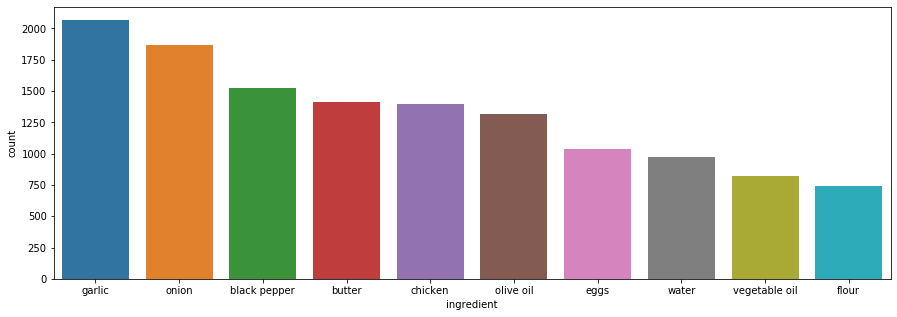

In [92]:
#Plot top ingredients using bag of words
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x = 'ingredient', y = 'count', data = top_ing.head(10))
sns.set_palette("deep")
plt.show()
# fig.savefig('ingredient_count_bag_of_words.png')

In [93]:
#PMI Calculation starts
#Point-wise mutual information to understand which ingredients go together and which ones don't

#Create combinations of ingredients
start_time = time.time()

l = []
for K in range(len(ingreds_a)):
    for L in range(2,3):
        for subset in itertools.combinations(ingreds_a[K], L):
            l.append(sorted(subset))       
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.44515395164489746 seconds ---


In [356]:
l[200]

['beef', 'cream of mushroom soup']

In [101]:
#Function - Point-wise mutual information
def pmi(dff, x, y):
    df = dff.copy()
    df['f_x'] = df.groupby(x)[x].transform('count')
    df['f_y'] = df.groupby(y)[y].transform('count')
    df['f_xy'] = df.groupby([x, y])[x].transform('count')
    df['pmi'] = np.log(len(df.index) * df['f_xy'] / (df['f_x'] * df['f_y']) )
    return df

In [358]:
#Convert list of tuples to dataframe
df1 = pd.DataFrame(l, columns = ['Ingredient1','Ingredient2'])
print(df1.count())

#Eliminate rows where Ingredient1 = Ingredient2
df1 = df1[df1['Ingredient1'] != df1['Ingredient2']]
print(df1.count())

Ingredient1    229291
Ingredient2    229291
dtype: int64
Ingredient1    228260
Ingredient2    228260
dtype: int64


In [360]:
#Calculate PMI
df1 = pmi(df1, 'Ingredient1', 'Ingredient2')
print(df1.count())

Ingredient1    228260
Ingredient2    228260
f_x            228260
f_y            228260
f_xy           228260
pmi            228260
dtype: int64


In [361]:
#Eliminate rows for the same ingredient combinations
print(df1.pmi.count())
df1 = df1.drop_duplicates()
print(df1.pmi.count())

#Sort df
df1 = df.sort_values('pmi',ascending='false')
df1.head()

228260
66132


KeyError: 'pmi'

In [108]:
# pip install -U gensim
#Implementing word2vec to get the recipes which are similar to each other

num_features = 300   # Word vector dimensionality                      
context = 1        # Context window size; 
downsampling = 1e-3   # threshold for configuring which higher-frequency words are randomly downsampled

# Initialize and train the model 
model = word2vec.Word2Vec(ingreds_a, size=num_features, window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

In [109]:

most_sim_list = []
corpus_sim_dict = {}
input_list = []
for i in res:
    try: 
        if len(i) > 0:
            #print i
            corpus_sim_dict.update({i:model.most_similar(i)})      
    except KeyError:
        pass

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [111]:
corpus_sim_dict

{'Italian sausage': [('cooking spray', 0.999879002571106),
  ('virgin olive oil', 0.999868631362915),
  ('green bell peppers', 0.9998666048049927),
  ('penne pasta', 0.999866247177124),
  ('bell peppers', 0.9998652338981628),
  ('pork', 0.9998645782470703),
  ('chicken bouillon', 0.9998642802238464),
  ('capers', 0.9998618364334106),
  ('turkey', 0.9998607635498047),
  ('carrot', 0.9998604655265808)],
 'beef': [('turkey', 0.9998587965965271),
  ('bacon', 0.9998496174812317),
  ('penne pasta', 0.9998429417610168),
  ('green bell peppers', 0.9998417496681213),
  ('green chile peppers', 0.999841570854187),
  ('cooking spray', 0.999841034412384),
  ('margarine', 0.9998409152030945),
  ('head cabbage', 0.9998381733894348),
  ('vegetable broth', 0.9998371601104736),
  ('chicken', 0.9998359680175781)],
 'onion': [('onions', 0.9998258948326111),
  ('yellow onion', 0.9998129606246948),
  ('green bell pepper', 0.9997847080230713),
  ('bell pepper', 0.9997819662094116),
  ('mushrooms', 0.99977600

In [113]:
sim_df = pd.DataFrame([])
for key,value in corpus_sim_dict.items():
    for i in value:
        sim_df = sim_df.append(pd.DataFrame({'Similar Ingredient':i[0],'Word2Vec Value': i[1],'Ingredient': key }, index=[0]), ignore_index=True)

In [114]:
sim_df.head()

,Similar Ingredient,Word2Vec Value,Ingredient
0,cooking spray,0.999879,Italian sausage
1,virgin olive oil,0.999869,Italian sausage
2,green bell peppers,0.999867,Italian sausage
3,penne pasta,0.999866,Italian sausage
4,bell peppers,0.999865,Italian sausage


In [115]:
word2vecTSNE = word2vec.Word2Vec(
    sg=1,
    size=num_features, window = context, sample = downsampling,
    min_count=3
)
word2vecTSNE.build_vocab(ingreds_a)

In [116]:
word2vecTSNE.train(ingreds_a,total_examples= word2vecTSNE.corpus_count, epochs=word2vecTSNE.iter)

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(144644, 246195)

In [120]:
import sklearn
from sklearn.manifold import TSNE
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [121]:
all_word_vectors_matrix = word2vecTSNE.wv.syn0
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [122]:

#Plot the big picture

points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[word2vecTSNE.wv.vocab[word].index])
            for word in word2vecTSNE.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


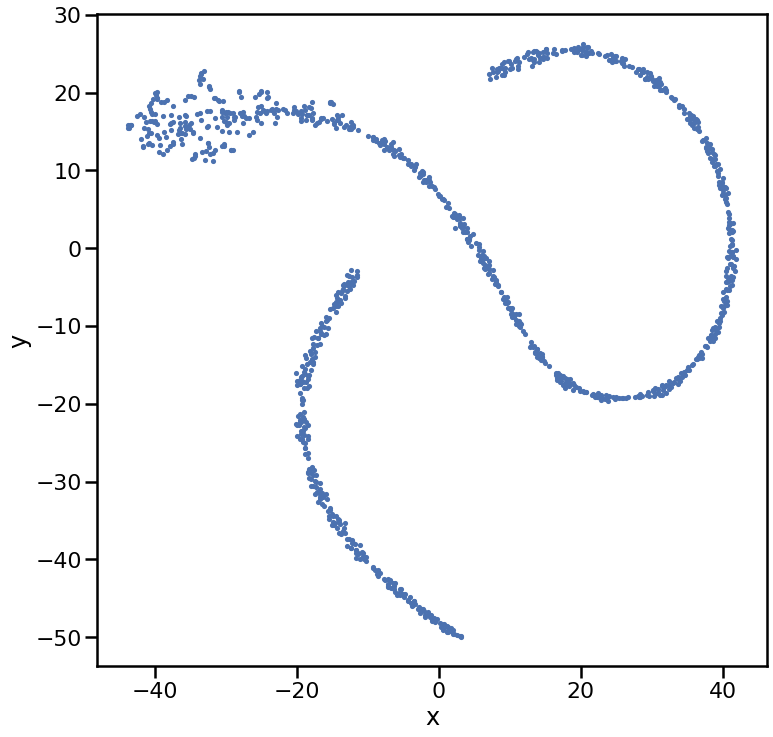

In [124]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(12, 12))
plt.show()

In [125]:
#Zoom in to some interesting places


def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    ax = slice.plot.scatter("x", "y", s=35, figsize=(100, 80))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


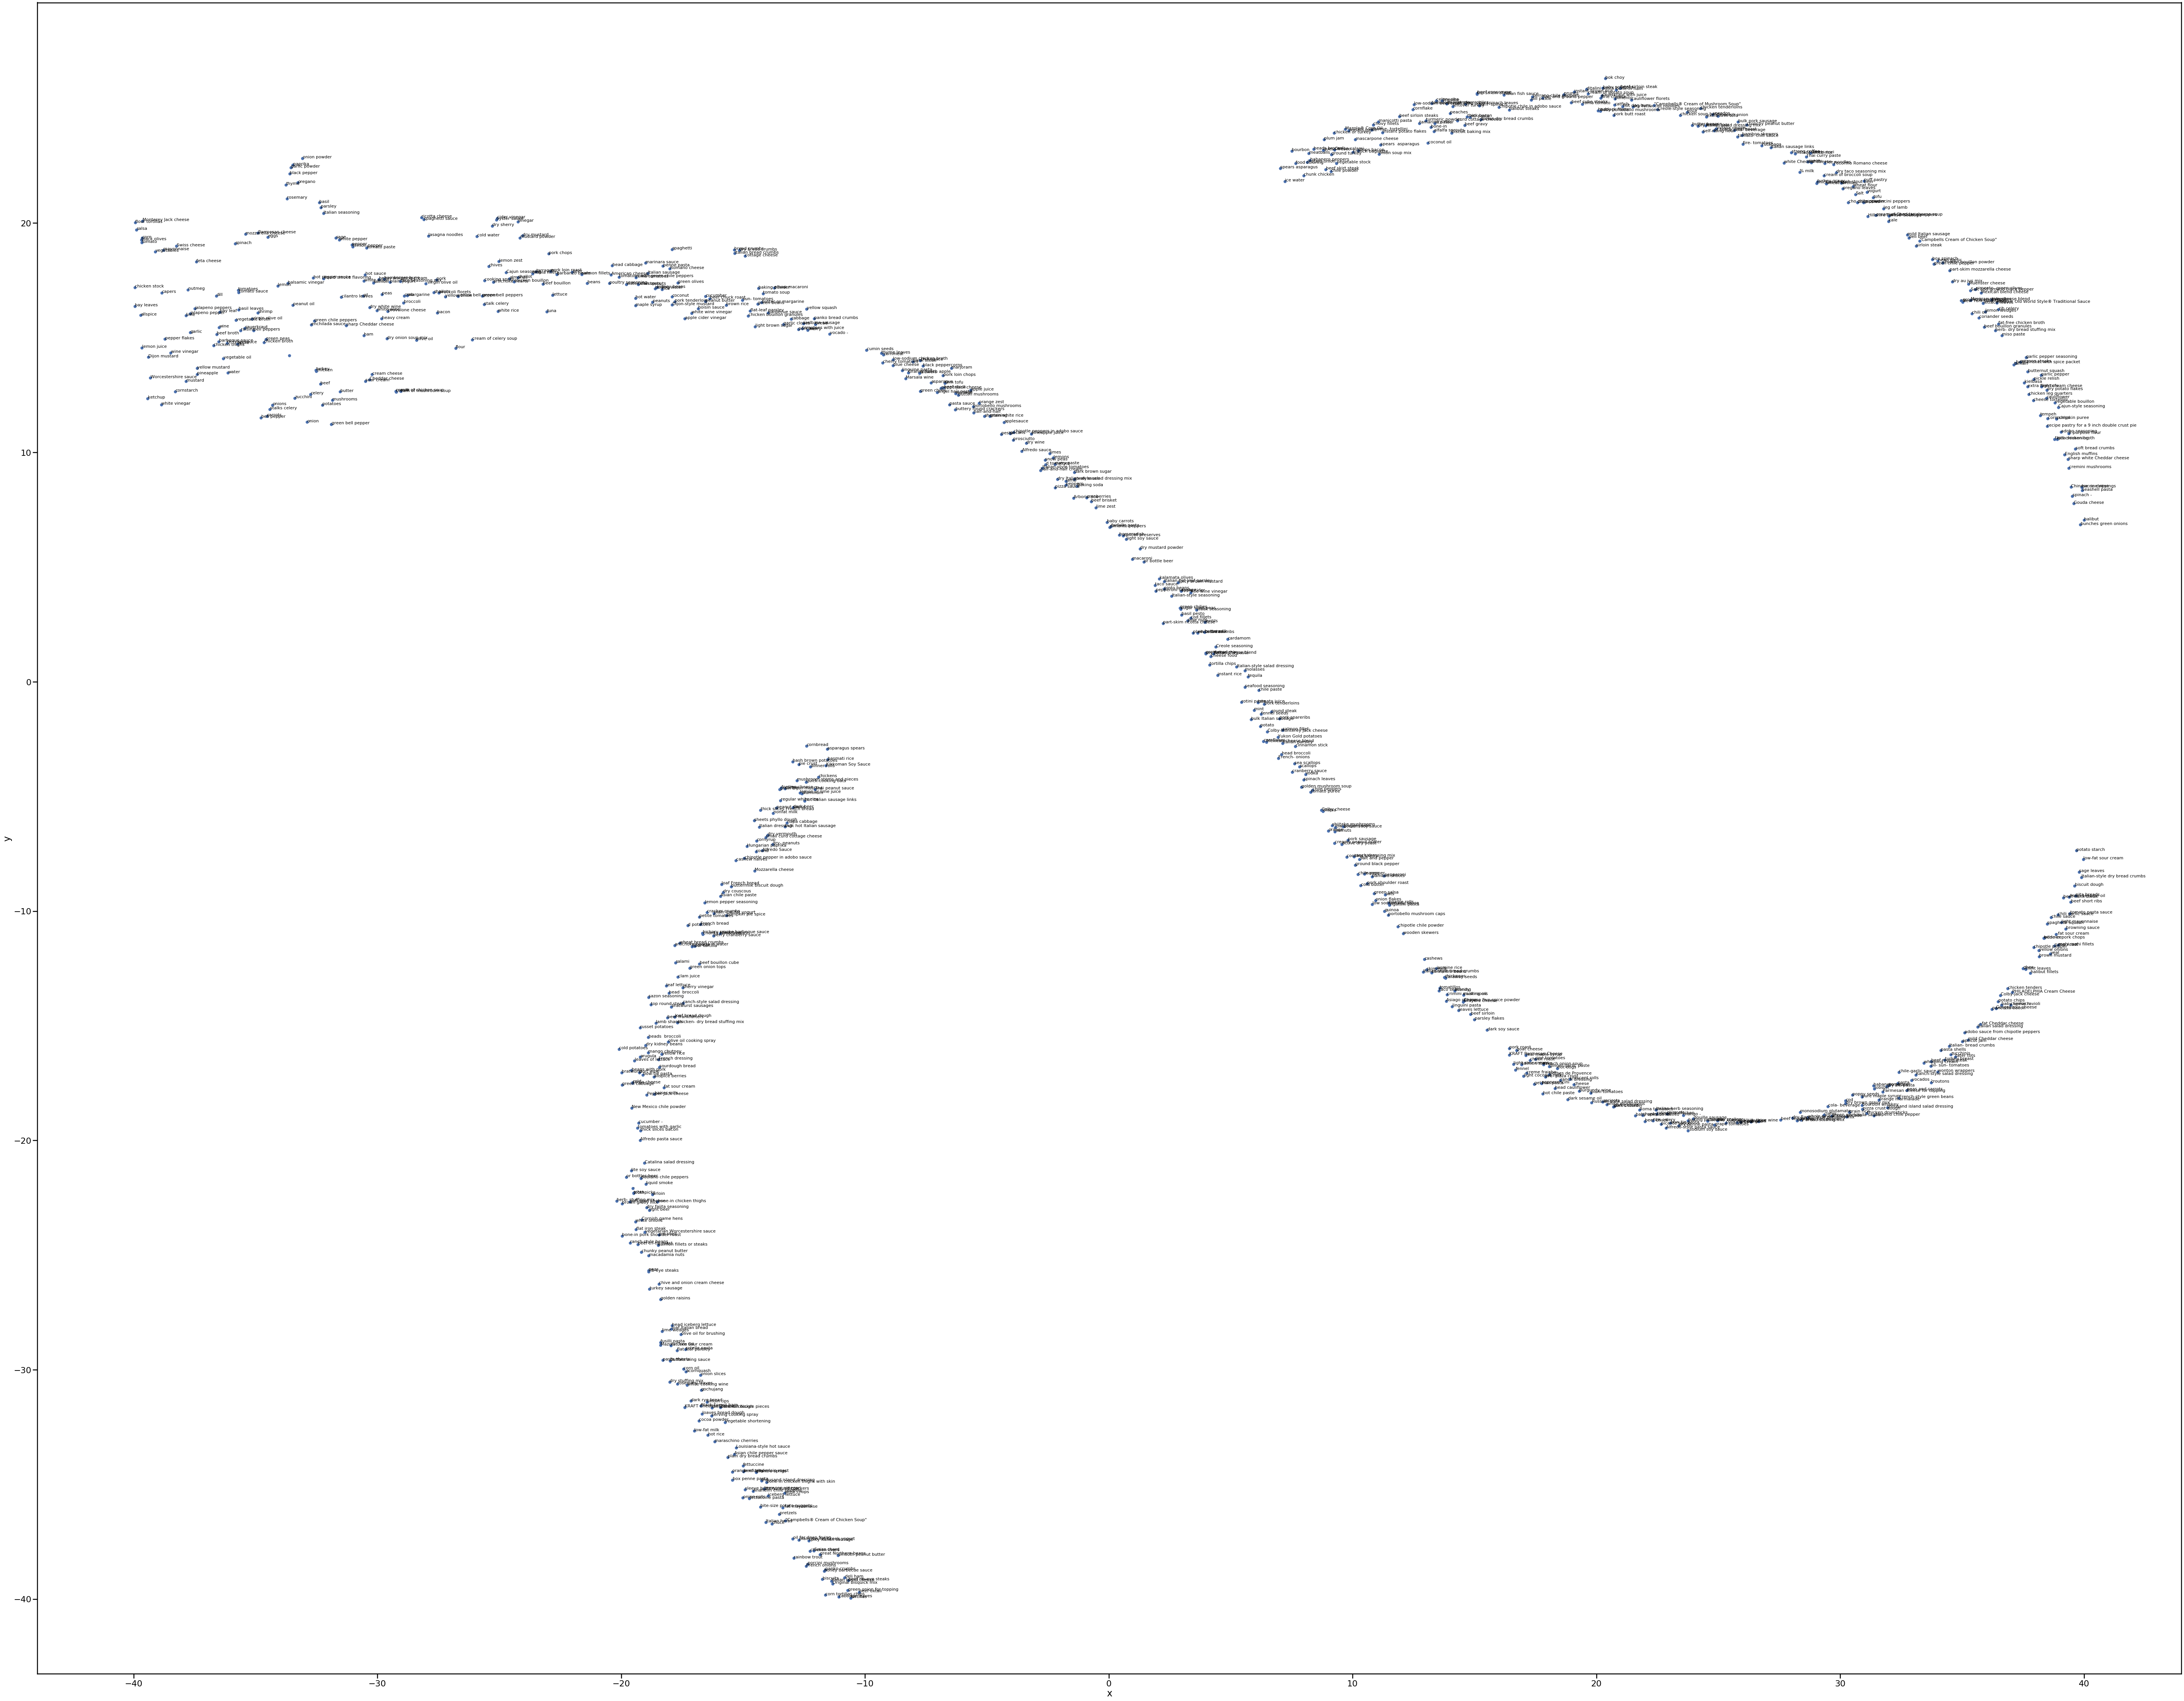

In [130]:
plot_region(x_bounds=(-40,40), y_bounds=(-40, 40))

In [138]:
model.most_similar('beef')

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('turkey', 0.9998587965965271),
 ('bacon', 0.9998496174812317),
 ('penne pasta', 0.9998429417610168),
 ('green bell peppers', 0.9998417496681213),
 ('green chile peppers', 0.999841570854187),
 ('cooking spray', 0.999841034412384),
 ('margarine', 0.9998409152030945),
 ('head cabbage', 0.9998381733894348),
 ('vegetable broth', 0.9998371601104736),
 ('chicken', 0.9998359680175781)]

In [139]:

#Create a dictionary for all the ingredients in the recipe list

dictionary = corpora.Dictionary(ingreds_a)
#print(dictionary)
#print(dictionary.token2id)

In [140]:

#Applying doc2bow on the dictionary of ingredients, which converts the ingredient to a number in every recipe
#This input format is needed for TfIdfmodel
bow_corpus = [dictionary.doc2bow(text) for text in ingreds_a]
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1)]

In [141]:
# train the model
tfidf = models.TfidfModel(bow_corpus)

In [142]:

corpus_tfidf = tfidf[bow_corpus]

In [144]:
for i in corpus_tfidf:
    print(i)
    break

[(0, 0.3458743121788917), (1, 0.2648296953934605), (2, 0.1454934553915815), (3, 0.3096901140117614), (4, 0.14826897493012095), (5, 0.09204963255457536), (6, 0.12120224141444919), (7, 0.436436613787197), (8, 0.0704713354785516), (9, 0.2963787281489263), (10, 0.18943921435121605), (11, 0.07702945821565954), (12, 0.16634947144340617), (13, 0.2844603421331148), (14, 0.2653842422741678), (15, 0.21989103307689495), (16, 0.18630453553626738), (17, 0.12746178894607435), (18, 0.21114511458219465)]


In [145]:
#print tfidf results for the first recipe
print(tfidf[bow_corpus[1]])

[(8, 0.12941632633456693), (19, 0.47196152984671086), (20, 0.4969090625829188), (21, 0.18611015271923873), (22, 0.2644429674078582), (23, 0.3183184803326594), (24, 0.3482403807654333), (25, 0.43176385058522754)]


In [146]:
#Use similarities library from gensim to get the cosine similarity of the tfidf results

index = similarities.MatrixSimilarity(tfidf[bow_corpus])
# index.save('ingr.index')
# index = similarities.MatrixSimilarity.load('ingr.index')

sims = index[corpus_tfidf]
sims_list = [(i,j) for i,j in enumerate(sims)]

#Creating a list to hold the cosine similarity results for tfidf
tf_idf_list = []

for i,j in enumerate(sims_list):
    tf_idf_list.append(sims_list[i][1])

In [147]:
#Create recipe dict- to be used in creating dataframe in next step - used to decode recipe id
recipe_dict =  {k: v for k, v in enumerate(raw_df.name)}
# recipe_dict

In [152]:
tf_idf_top  = []
similar_recipes_df = pd.DataFrame([])
same_item = []

#Get only top 11 largest values from the tf_idf_list - 1 recipe will be the same as itself (hence 12)
for i,item in enumerate(tf_idf_list):
    tf_idf_top.append(heapq.nlargest(11,enumerate(item), key=lambda x: x[1]))

#Remove the recipe value with 1.0 similarity - since it is the same recipe
for i,list_item in enumerate(tf_idf_top):
    for j,k in enumerate(list_item):
        if tf_idf_top[i][j][1] != 1.0:
            similar_recipes_df = similar_recipes_df.append(pd.DataFrame({'Similar_Recipe_ID': recipe_dict.get(tf_idf_top[i][j][0]),'TF-IDF Value': tf_idf_top[i][j][1],'Recipe_ID': recipe_dict.get(i)}, index=[0]), ignore_index=True)

In [153]:
similar_recipes_df = similar_recipes_df[similar_recipes_df['Recipe_ID'] != similar_recipes_df['Similar_Recipe_ID']]
print(similar_recipes_df.count())

Similar_Recipe_ID    55344
TF-IDF Value         55344
Recipe_ID            55344
dtype: int64


In [154]:
#Create cosine similarity matrix for all recipes 27637*27637
#Since this is a huge matrix, the top 10 similar recipe logic is a better option.

names = [i for i in range(1,len(tf_idf_list))]
final_df = pd.DataFrame.from_items(zip(names,tf_idf_list))

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """


In [157]:

raw_df['recipe_id'] = raw_df.index
recipe_name_df = raw_df[['recipe_id','name']]
final_df['recipe_id'] = final_df.index

recipe_tf_idf_df = final_df.merge(recipe_name_df,how='left', left_on='recipe_id', right_on='recipe_id')

In [158]:

recipe_tf_idf_df.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,5290,5291,5292,5293,5294,5295,5296,5297,5298,5299,5300,5301,5302,5303,5304,5305,5306,5307,5308,5309,5310,5311,5312,5313,5314,5315,5316,5317,5318,5319,5320,5321,5322,5323,5324,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334,5335,5336,5337,5338,5339,5340,5341,5342,5343,5344,5345,5346,5347,5348,5349,5350,5351,5352,5353,5354,5355,5356,5357,5358,5359,5360,5361,5362,5363,5364,5365,5366,5367,5368,5369,5370,5371,5372,5373,5374,5375,5376,5377,5378,5379,5380,5381,5382,5383,5384,5385,5386,5387,5388,5389,5390,5391,5392,5393,5394,5395,5396,5397,5398,5399,5400,5401,5402,5403,5404,5405,5406,5407,5408,5409,5410,5411,5412,5413,5414,5415,5416,5417,5418,5419,5420,5421,5422,5423,5424,5425,5426,5427,5428,5429,5430,5431,5432,5433,5434,5435,5436,5437,5438,5439,5440,5441,5442,5443,5444,5445,5446,5447,5448,5449,5450,5451,5452,5453,5454,5455,5456,5457,5458,5459,5460,5461,5462,5463,5464,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474,5475,5476,5477,5478,5479,5480,5481,5482,5483,5484,5485,5486,5487,5488,5489,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499,5500,5501,5502,5503,5504,5505,5506,5507,5508,5509,5510,5511,5512,5513,5514,5515,5516,5517,5518,5519,5520,5521,5522,5523,5524,5525,5526,5527,5528,5529,5530,5531,5532,5533,5534,5535,5536,5537,recipe_id,name
0,1.000000,0.009120,0.091519,0.012326,0.094171,0.027318,0.035812,0.023446,0.117832,0.129085,0.013546,0.009986,0.003610,0.034016,0.020750,0.048678,0.069391,0.013153,0.016583,0.050829,0.024363,0.011614,0.113297,0.120977,0.078806,0.084387,0.068503,0.000000,0.000000,0.022497,0.053674,0.012755,0.025597,0.028793,0.0,0.000000,0.087257,0.000000,0.077534,0.082695,0.011060,0.008738,0.000000,0.077562,0.157935,0.000000,0.030686,0.000000,0.174233,0.149184,0.070662,0.000000,0.0,0.152197,0.031087,0.056538,0.236356,0.083397,0.038186,0.050844,0.099702,0.027154,0.039046,0.062192,0.032926,0.282784,0.053284,0.050515,0.028849,0.031180,0.136594,0.008534,0.136516,0.035445,0.019929,0.056521,0.021018,0.027930,0.000000,0.095402,0.054247,0.031611,0.010202,0.023504,0.011205,0.007316,0.037098,0.012299,0.157251,0.006592,0.276322,0.051078,0.062812,0.066943,0.085169,0.068142,0.016765,0.00000,0.054265,0.035445,0.028044,0.0,0.000000,0.008526,0.138997,0.179739,0.101176,0.310987,0.024260,0.043580,0.000000,0.134346,0.016837,0.033219,0.000000,0.146460,0.007839,0.032307,0.0,0.060158,0.028708,0.040992,0.122429,0.033663,0.067482,0.015930,0.000000,0.090604,0.015993,0.095738,0.141323,0.076796,0.0,0.030632,0.149940,0.077404,0.000000,0.040661,0.000000,0.018403,0.151370,0.022986,0.008422,0.014495,0.000000,0.034365,0.112595,0.000000,0.217756,0.004909,0.027089,0.102372,0.028927,0.044924,0.0,0.009358,0.125383,0.0,0.014865,0.019321,0.124725,0.011334,0.025096,0.055526,0.154716,0.000000,0.000000,0.0,0.031809,0.023653,0.196106,0.219039,0.0,0.030457,0.026908,0.033418,0.122115,0.020731,0.081549,0.160943,0.055578,0.017072,0.008700,0.000000,0.047283,0.005775,0.007893,0.107512,0.000000,0.000000,0.496339,0.087269,0.011743,0.031674,0.009066,0.069599,0.056656,0.010460,0.020885,0.027064,0.044053,0.000000,0.0,0.012327,0.037683,0.017477,0.005387,0.0,0.100586,0.092499,0.043017,0.0

In [159]:

#Create a list from tfidf results
#This will be used to identify ingredient importance within every recipe

corpus_list = []
for doc in corpus_tfidf:
    corpus_list.append(doc)

In [160]:

#Create a flat list to eliminate repetition of ingredients and create a dict to hold the results

flat_list = []
for sublist in ingreds_a:
    for item in sublist:
        if item not in flat_list:
            flat_list.append(item)
ing_dict =  {k: v for k, v in enumerate(flat_list)}

In [162]:
len(ing_dict)

3111

In [163]:
dictionary.get(corpus_list[0][0][0])

'Italian sausage'

In [164]:
#Create a dataframe with tf-idf values per ingredient for every recipe.
corpus_df = pd.DataFrame([])

for i,list_item in enumerate(corpus_list):
    for j,k in enumerate(list_item):
        corpus_df = corpus_df.append(pd.DataFrame({'Ingredient': dictionary.get(corpus_list[i][j][0]),'TF-IDF Value': corpus_list[i][j][1],'Recipe_ID': i}, index=[0]), ignore_index=True)

In [166]:
raw_df['recipe_id'] = raw_df.index
recipe_tf_idf_df = corpus_df.merge(raw_df,how='left', left_on='Recipe_ID', right_on='recipe_id')
recipe_tf_idf_df = recipe_tf_idf_df[['Recipe_ID','name','Ingredient','TF-IDF Value']]
recipe_tf_idf_df.head(20)

,Recipe_ID,name,Ingredient,TF-IDF Value
0,0,World's Best Lasagna,Italian sausage,0.345874
1,0,World's Best Lasagna,Italian seasoning,0.264830
2,0,World's Best Lasagna,Parmesan cheese,0.145493
3,0,World's Best Lasagna,basil leaves,0.309690
4,0,World's Best Lasagna,beef,0.148269
5,0,World's Best Lasagna,black pepper,0.092050
6,0,World's Best Lasagna,eggs,0.121202
7,0,World's Best Lasagna,fennel seeds,0.436437
8,0,World's Best Lasagna,garlic,0.070471
9,0,World's Best Lasagna,lasagna noodles,0.296379


In [167]:
recipe_tf_idf_df.sample(20)

,Recipe_ID,name,Ingredient,TF-IDF Value
11148,1295,Slow Cooker Chile Verde,pork shoulder,0.572831
26918,3109,Rosemary and Garlic Simmered Pork Chops,butter,0.150014
11443,1325,Chicken Garlic Pizza,chicken,0.112857
23086,2668,Tasty Baked Mac n Cheese,elbow macaroni,0.393430
44409,5095,Chicken Fricassee,stalks celery,0.342762
21691,2509,Simple Tuna Melt,balsamic vinegar,0.297504
12842,1490,Kickin' London Broil with Bleu Cheese Butter,olive oil,0.137214
6912,802,Ham Tetrazzini,onion,0.106989
17548,2046,Chicken Francesa,white wine,0.261038
1503,173,Tuna Noodle Casserole from Scratch,garlic,0.083875


In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus1 = ingreds_a
vectorizer1 = TfidfVectorizer(min_df=1)
X1 = vectorizer1.fit_transform(raw_df['cleaned_ings'])
idf1 = vectorizer1.idf_
print(dict(zip(vectorizer1.get_feature_names(), idf1)))

{'10': 8.926422077473159, '100': 8.520956969364995, '98': 7.4223446806968845, 'achiote': 8.233274896913214, 'acid': 8.926422077473159, 'acornquash': 8.233274896913214, 'active': 6.623836984479113, 'additional': 8.926422077473159, 'adobo': 6.00865134538888, 'agu': 8.926422077473159, 'ahi': 8.926422077473159, 'alaskan': 8.926422077473159, 'ale': 7.827809788805049, 'aleppo': 8.233274896913214, 'alfalfa': 8.010131345599003, 'alfredo': 5.981983098306718, 'all': 8.233274896913214, 'allspice': 5.930689803919168, 'almond': 8.233274896913214, 'almonds': 5.956007611903457, 'aluminum': 7.827809788805049, 'amaretto': 8.926422077473159, 'american': 5.727748959922478, 'amino': 8.926422077473159, 'anaheim': 7.827809788805049, 'ancho': 8.233274896913214, 'and': 4.642835515612529, 'andouille': 8.233274896913214, 'angel': 5.956007611903457, 'anise': 8.520956969364995, 'annatto': 8.926422077473159, 'any': 8.520956969364995, 'apid': 8.926422077473159, 'apple': 4.656724627773197, 'applegrapecherry': 8.9264

In [175]:
raw_df.head()

,name,ingredients,total_time,avg_rating,ings_cleaned,cleaned_ings,calories_g,fat_g,carbohydrates_g,protein_g,cholesterol_mg,sodium_mg,recipe_id
0,World's Best Lasagna,"['1 pound sweet Italian sausage', '3/4 pound lean ground beef', '1/2 cup minced onion', '2 cloves garlic, crushed', '1 (28 ounce) can crushed tomatoes', '2 (6 ounce) cans tomato paste', '2 (6.5 ounce) cans canned tomato sauce', '1/2 cup water', '2 tablespoons white sugar', '1 1/2 teaspoons dried basil leaves', '1/2 teaspoon fennel seeds', '1 teaspoon Italian seasoning', '1 1/2 teaspoons salt, divided, or to taste', '1/4 teaspoon ground black pepper', '4 tablespoons chopped fresh parsley', '12 lasagna noodles', '16 ounces ricotta cheese', '1 egg', '3/4 pound mozzarella cheese, sliced', '3/4 cup grated Parmesan cheese']",195.0,4.80,"['sweet Italian sausage', 'lean ground beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",448.0,21.3,36.5,29.7,82,1400.0,0
1,Pork Chops in Garlic Mushroom Sauce,"['2 pounds boneless pork chops', '1/2 teaspoon paprika', '1 pinch kosher salt and ground black pepper to taste', '1/4 cup butter, divided', '1 (8 ounce) package sliced fresh mushrooms', '4 cloves garlic, minced', '1 teaspoon Dijon mustard', '2 tablespoons all-purpose flour', '2 cups beef broth']",30.0,4.61,"['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'all-purpose flour', 'beef broth']","['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'flour', 'beef broth']",199.0,13.4,3.1,16.3,54,333.0,1
2,Super Duper Slow Cooker Beef Stroganoff,"['1 1/2 pounds cubed beef stew meat', 'salt and ground black pepper to taste', '1 onion, chopped', '1 (10.75 ounce) can condensed cream of mushroom soup', '1/4 cup water', '1 tablespoon dried chives', '2 cloves garlic, minced', '1 tablespoon Worcestershire sauce', '1 cube beef bouillon', '1/2 cup red wine', '1 tablespoon cornstarch', '1 tablespoon all-purpose flour', '1 (8 ounce) container sour cream', '1 (8 ounce) package sliced fresh mushrooms', '4 ounces cream cheese', '1/2 cup chopped fresh parsley']",435.0,4.63,"['beef stew meat', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'all-purpose flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']","['beef', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']",394.0,24.2,14.3,26.3,97,629.0,2
3,Chef John's Perfect Prime Rib,"['4 pounds prime rib roast', '1/4 cup unsalted butter, softened', '1 tablespoon freshly ground black pepper', '1 teaspoon herbes de Provence', 'kosher salt']",390.0,4.77,"['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']","['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']",1757.0,160.6,1.0,72.5,362,343.0,3
4,Beef Stroganoff for Instant Pot®,"['2 tablespoons canola oil', '1/2 onion, diced', '2 teaspoons salt, divided', '2 pounds beef stew meat, cut into 1-inch cubes', '1 teaspoon freshly ground black pepper', '3 cloves garlic, minced', '1/2 teaspoon dried thyme', '2 tablespoons soy sauce', '3 cups chopped mushrooms', '2 tablespoons all-purpose flour', '3 cups chicken broth', '1 (16 ounce) package wide egg noodles', '3/4 cup sour cream, or to taste']",62.0,4.46,"['canola oil', 'onion', 'beef stew meat', 'black pepper', 'garlic', 'thyme', 'soy sauce', 'mushrooms', 'all-purpose flour', 'c

In [185]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text) 
#     text = text.replace("nbsp", "")
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [221]:
raw_df.head()

,name,ingredients,total_time,avg_rating,ings_cleaned,cleaned_ings,calories_g,fat_g,carbohydrates_g,protein_g,cholesterol_mg,sodium_mg,recipe_id
0,World's Best Lasagna,"['1 pound sweet Italian sausage', '3/4 pound lean ground beef', '1/2 cup minced onion', '2 cloves garlic, crushed', '1 (28 ounce) can crushed tomatoes', '2 (6 ounce) cans tomato paste', '2 (6.5 ounce) cans canned tomato sauce', '1/2 cup water', '2 tablespoons white sugar', '1 1/2 teaspoons dried basil leaves', '1/2 teaspoon fennel seeds', '1 teaspoon Italian seasoning', '1 1/2 teaspoons salt, divided, or to taste', '1/4 teaspoon ground black pepper', '4 tablespoons chopped fresh parsley', '12 lasagna noodles', '16 ounces ricotta cheese', '1 egg', '3/4 pound mozzarella cheese, sliced', '3/4 cup grated Parmesan cheese']",195.0,4.80,"['sweet Italian sausage', 'lean ground beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",448.0,21.3,36.5,29.7,82,1400.0,0
1,Pork Chops in Garlic Mushroom Sauce,"['2 pounds boneless pork chops', '1/2 teaspoon paprika', '1 pinch kosher salt and ground black pepper to taste', '1/4 cup butter, divided', '1 (8 ounce) package sliced fresh mushrooms', '4 cloves garlic, minced', '1 teaspoon Dijon mustard', '2 tablespoons all-purpose flour', '2 cups beef broth']",30.0,4.61,"['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'all-purpose flour', 'beef broth']","['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'flour', 'beef broth']",199.0,13.4,3.1,16.3,54,333.0,1
2,Super Duper Slow Cooker Beef Stroganoff,"['1 1/2 pounds cubed beef stew meat', 'salt and ground black pepper to taste', '1 onion, chopped', '1 (10.75 ounce) can condensed cream of mushroom soup', '1/4 cup water', '1 tablespoon dried chives', '2 cloves garlic, minced', '1 tablespoon Worcestershire sauce', '1 cube beef bouillon', '1/2 cup red wine', '1 tablespoon cornstarch', '1 tablespoon all-purpose flour', '1 (8 ounce) container sour cream', '1 (8 ounce) package sliced fresh mushrooms', '4 ounces cream cheese', '1/2 cup chopped fresh parsley']",435.0,4.63,"['beef stew meat', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'all-purpose flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']","['beef', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']",394.0,24.2,14.3,26.3,97,629.0,2
3,Chef John's Perfect Prime Rib,"['4 pounds prime rib roast', '1/4 cup unsalted butter, softened', '1 tablespoon freshly ground black pepper', '1 teaspoon herbes de Provence', 'kosher salt']",390.0,4.77,"['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']","['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']",1757.0,160.6,1.0,72.5,362,343.0,3
4,Beef Stroganoff for Instant Pot®,"['2 tablespoons canola oil', '1/2 onion, diced', '2 teaspoons salt, divided', '2 pounds beef stew meat, cut into 1-inch cubes', '1 teaspoon freshly ground black pepper', '3 cloves garlic, minced', '1/2 teaspoon dried thyme', '2 tablespoons soy sauce', '3 cups chopped mushrooms', '2 tablespoons all-purpose flour', '3 cups chicken broth', '1 (16 ounce) package wide egg noodles', '3/4 cup sour cream, or to taste']",62.0,4.46,"['canola oil', 'onion', 'beef stew meat', 'black pepper', 'garlic', 'thyme', 'soy sauce', 'mushrooms', 'all-purpose flour', 'c

In [223]:
def lemma(words):    
    sent = []
    token = nlp(words)
    for word in token:
        sent.append(word.lemma_)
    return(" ".join(sent))

In [227]:
import spacy

In [229]:
from spacy.lang.en import English
parser = English()
nlp = spacy.load('en')

In [232]:
raw_df['lem'] = raw_df['cleaned_ings'].apply(lambda x: lemma(x))

In [235]:
raw_df['ing_str'] = raw_df['cleaned_ings'].apply(lambda x: " ".join(x).replace('[',''))

In [239]:
raw_df.head()

,name,ingredients,total_time,avg_rating,ings_cleaned,cleaned_ings,calories_g,fat_g,carbohydrates_g,protein_g,cholesterol_mg,sodium_mg,recipe_id,lem,ing_str
0,World's Best Lasagna,"['1 pound sweet Italian sausage', '3/4 pound lean ground beef', '1/2 cup minced onion', '2 cloves garlic, crushed', '1 (28 ounce) can crushed tomatoes', '2 (6 ounce) cans tomato paste', '2 (6.5 ounce) cans canned tomato sauce', '1/2 cup water', '2 tablespoons white sugar', '1 1/2 teaspoons dried basil leaves', '1/2 teaspoon fennel seeds', '1 teaspoon Italian seasoning', '1 1/2 teaspoons salt, divided, or to taste', '1/4 teaspoon ground black pepper', '4 tablespoons chopped fresh parsley', '12 lasagna noodles', '16 ounces ricotta cheese', '1 egg', '3/4 pound mozzarella cheese, sliced', '3/4 cup grated Parmesan cheese']",195.0,4.80,"['sweet Italian sausage', 'lean ground beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",448.0,21.3,36.5,29.7,82,1400.0,0,"[ ' italian sausage ' , ' beef ' , ' onion ' , ' garlic ' , ' tomato ' , ' tomato paste ' , ' tomato sauce ' , ' water ' , ' white sugar ' , ' basil leave ' , ' fennel seed ' , ' italian seasoning ' , ' black pepper ' , ' parsley ' , ' lasagna noodles ' , ' ricotta cheese ' , ' egg ' , ' mozzarella cheese ' , ' parmesan cheese ' ]","' I t a l i a n s a u s a g e ' , ' b e e f ' , ' o n i o n ' , ' g a r l i c ' , ' t o m a t o e s ' , ' t o m a t o p a s t e ' , ' t o m a t o s a u c e ' , ' w a t e r ' , ' w h i t e s u g a r ' , ' b a s i l l e a v e s ' , ' f e n n e l s e e d s ' , ' I t a l i a n s e a s o n i n g ' , ' b l a c k p e p p e r ' , ' p a r s l e y ' , ' l a s a g n a n o o d l e s ' , ' r i c o t t a c h e e s e ' , ' e g g s ' , ' m o z z a r e l l a c h e e s e ' , ' P a r m e s a n c h e e s e ' ]"
1,Pork Chops in Garlic Mushroom Sauce,"['2 pounds boneless pork chops', '1/2 teaspoon paprika', '1 pinch kosher salt and ground black pepper to taste', '1/4 cup butter, divided', '1 (8 ounce) package sliced fresh mushrooms', '4 cloves garlic, minced', '1 teaspoon Dijon mustard', '2 tablespoons all-purpose flour', '2 cups beef broth']",30.0,4.61,"['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'all-purpose flour', 'beef broth']","['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'flour', 'beef broth']",199.0,13.4,3.1,16.3,54,333.0,1,"[ ' pork chop ' , ' paprika ' , ' butter ' , ' mushroom ' , ' garlic ' , ' dijon mustard ' , ' flour ' , ' beef broth ' ]","' p o r k c h o p s ' , ' p a p r i k a ' , ' b u t t e r ' , ' m u s h r o o m s ' , ' g a r l i c ' , ' D i j o n m u s t a r d ' , ' f l o u r ' , ' b e e f b r o t h ' ]"
2,Super Duper Slow Cooker Beef Stroganoff,"['1 1/2 pounds cubed beef stew meat', 'salt and ground black pepper to taste', '1 onion, chopped', '1 (10.75 ounce) can condensed cream of mushroom soup', '1/4 cup water', '1 tablespoon dried chives', '2 cloves garlic, minced', '1 tablespoon Worcestershire sauce', '1 cube beef bouillon', '1/2 cup red wine', '1 tablespoon cornstarch', '1 tablespoon all-purpose flour', '1 (8 ounce) container sour cream', '1 (8 ounce) package sliced fresh mushrooms', '4 ounces cream cheese', '1/2 cup chopped fresh parsley']",435.0,4.63,"['beef stew meat', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'all-purpose flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']","['beef', 'onion', 'cream of mushroom soup', 'water', 

In [241]:
raw_df.drop(columns=['ing_str','lem'],inplace=True)

In [254]:
def letters_only(word):
    return word.isalpha()

def get_nouns_adjs(words):
    """This pulls out any nouns + adjs in the words"""
    nouns_adjs = []
    tags = ['NN', 'NNP', 'NNPS', 'NNS', 'JJ', 'JJS']
    doc = nlp(words)
    for word in doc:
        if word.tag_ in tags and word.text not in stop and letters_only(word.text):
            nouns_adjs.append(word.text)
    return nouns_adjs

In [248]:
raw_df['lem'] = ingreds_a.apply(lambda x: lemma(x))

SyntaxError: invalid syntax (<ipython-input-248-a807826d2083>, line 1)

In [255]:
for a in ingreds_a:
    for b in a:
        print(get_nouns_adjs(b))

['Italian', 'sausage']
['beef']
['onion']
['garlic']
['tomatoes']
['tomato', 'paste']
['tomato', 'sauce']
['water']
['white', 'sugar']
['basil', 'leaves']
['fennel', 'seeds']
['Italian', 'seasoning']
['black', 'pepper']
['parsley']
['lasagna', 'noodles']
['ricotta', 'cheese']
['eggs']
['mozzarella', 'cheese']
['Parmesan', 'cheese']
['pork', 'chops']
['paprika']
['butter']
['mushrooms']
['garlic']
['mustard']
['flour']
['beef', 'broth']
['beef']
['onion']
['cream', 'mushroom', 'soup']
['water']
['chives']
['garlic']
['Worcestershire', 'sauce']
['beef', 'bouillon']
['wine']
['cornstarch']
['flour']
['sour', 'cream']
['mushrooms']
['cream', 'cheese']
['parsley']
['prime', 'rib', 'roast']
['butter']
['black', 'pepper']
['herbes', 'de', 'Provence']
['canola', 'oil']
['onion']
['beef']
['black', 'pepper']
['garlic']
['thyme']
['soy', 'sauce']
['mushrooms']
['flour']
['chicken', 'broth']
['eggs']
['sour', 'cream']
['water']
['soy', 'sauce']
['brown', 'sugar']
['honey']
['garlic']
['ginger']
[

['cayenne', 'pepper']
['paprika']
['garlic', 'powder']
['onion', 'powder']
['thyme']
['parsley']
['chicken']
['butter']
['olive', 'oil']
['garlic', 'powder']
['lime', 'juice']
['MEATBALLS']
['beef']
['bread']
['parsley']
['Parmesan', 'cheese']
['black', 'pepper']
['garlic', 'powder']
['eggs']
['SAUCE']
['onion']
['garlic']
['olive', 'oil']
['tomatoes']
['white', 'sugar']
['bay', 'leaf']
['tomato', 'paste']
['basil']
['black', 'pepper']
['garlic']
['olive', 'oil']
['tomato', 'sauce']
['wine', 'vinegar']
['basil']
['cayenne', 'pepper']
['shrimp']
['skewers']
['butter']
['mustard']
['honey']
['dry', 'bread']
['pecans']
['parsley']
['salmon']
['lemon']
['pork', 'tenderloin']
['dry', 'onion', 'soup', 'mix']
['water']
['wine']
['garlic']
['soy', 'sauce']
['black', 'pepper']
['beef', 'sirloin']
['garlic', 'powder']
['vegetable', 'oil']
['beef', 'bouillon']
['hot', 'water']
['cornstarch']
['onion']
['green', 'bell', 'peppers']
['tomatoes']
['soy', 'sauce']
['white', 'sugar']
['elbow', 'macaron

['lasagna', 'noodles']
['butter']
['onion']
['garlic']
['flour']
['chicken', 'broth']
['milk']
['mozzarella', 'cheese']
['Parmesan', 'cheese']
['basil']
['oregano']
['black', 'pepper']
['ricotta', 'cheese']
[]
['spinach']
['parsley']
['Parmesan', 'cheese']
['beef']
['salsa']
['chili', 'beans']
['tortilla', 'chips']
['sour', 'cream']
['black', 'olives']
['green', 'onion']
['tomato']
['Cheddar', 'cheese']
['flour']
['dry', 'potato', 'flakes']
['black', 'pepper']
['eggs']
['chicken']
['vegetable', 'oil']
['thick', 'pork', 'chops']
['vegetable', 'oil']
['brown', 'sugar']
['cinnamon']
['nutmeg']
['butter']
['apple']
['pecans']
['eggs']
['milk']
['Italian', 'bread']
['Parmesan', 'cheese']
['parsley']
['olive', 'oil']
['garlic']
['pork', 'chops']
['cider', 'vinegar']
['coarse', 'ground', 'mustard']
['garlic']
['lime']
['lemon']
['brown', 'sugar']
['black', 'pepper']
['olive', 'oil']
['chicken']
['elbow', 'macaroni']
['sharp', 'Cheddar', 'cheese']
['Parmesan', 'cheese']
['milk']
['butter']
['f

['onion']
['garlic']
['bell', 'pepper']
['green', 'bell', 'pepper']
['basil']
['oregano']
['white', 'wine']
['penne', 'pasta']
['virgin', 'olive', 'oil']
['garlic']
['pepper', 'flakes']
['tomatoes']
[]
['heavy', 'whipping', 'cream']
['parsley']
['Italian', 'sausage']
['bone', 'turkey', 'breast']
['dry', 'onion', 'soup', 'mix']
['butter']
['eggs']
['onion']
['stalk', 'celery']
['garlic']
['button', 'mushrooms']
['flour']
['milk']
['tuna']
['peas']
['bread']
['butter']
['Cheddar', 'cheese']
['white', 'rice']
['water']
['chicken']
['Monterey', 'Jack', 'cheese']
['Cheddar', 'cheese']
['cream', 'chicken', 'soup']
['cream', 'mushroom', 'soup']
['onion']
['mild', 'salsa']
['mustard']
['butter']
['honey']
['bread']
['pecans']
['parsley']
['salmon']
['lemon', 'wedges']
['leaves', 'cabbage']
['white', 'rice']
['eggs']
['milk']
['onion']
['beef']
['black', 'pepper']
['tomato', 'sauce']
['brown', 'sugar']
['lemon', 'juice']
['Worcestershire', 'sauce']
['vegetable', 'oil']
['soy', 'sauce']
['wine',

['soy', 'sauce']
['balsamic', 'vinegar']
['green', 'onions']
['brown', 'sugar']
['garlic']
['ginger']
['pepper', 'flakes']
['sesame', 'oil']
['beef', 'cube', 'steaks']
['flour']
['powder']
['soda']
['black', 'pepper']
['buttermilk']
['eggs']
['hot', 'pepper', 'sauce']
['garlic']
['vegetable', 'deep', 'frying']
['flour']
['milk']
['peanut', 'oil']
['shallot']
['white', 'onion']
['butter']
['lemon', 'juice']
['ginger', 'garlic', 'paste']
['garam', 'masala']
['chili', 'powder']
['cumin']
['bay', 'leaf']
['plain', 'yogurt']
['half', 'half']
['tomato', 'puree']
['cayenne', 'pepper']
['black', 'pepper']
['peanut', 'oil']
['chicken', 'thighs']
['garam', 'masala']
['cayenne', 'pepper']
['cornstarch']
['water']
['beef']
['onion']
['garlic']
['cumin']
['pepper']
['green', 'chile', 'peppers']
['beans']
['chili', 'beans']
['tomato', 'soup']
['enchilada', 'sauce']
['flour', 'tortillas']
['lettuce']
['tomatoes']
['Mexican', 'blend', 'cheese']
['green', 'onions']
['garlic']
['rosemary']
['pork', 'loi

['tomato', 'sauce']
['heavy', 'cream']
['cayenne', 'pepper']
['garam', 'masala']
['chicken']
['vegetable', 'oil']
['tandoori', 'masala']
['beef', 'chuck', 'roast']
['garlic']
['pepperoncini']
['hoagie', 'rolls']
['provolone', 'cheese']
['pork', 'chops']
['butter']
['milk']
['water']
['cream', 'mushroom', 'soup']
['Cornish', 'game', 'hens']
['lemon']
['rosemary']
['olive', 'oil']
['garlic']
['white', 'wine']
['low', 'sodium', 'chicken', 'broth']
['rosemary']
['olive', 'oil']
['garlic']
['pepper', 'flakes']
['tomatoes', 'garlic', 'olive', 'oil']
['tomato', 'sauce']
['basil']
['penne', 'pasta']
['eggs']
['bread']
['garlic', 'powder']
['pepper']
['chicken']
['beef']
['onion']
['tater', 'tots']
['cream', 'mushroom', 'soup']
['milk']
['Cheddar', 'cheese']
['tilapia']
['Cajun', 'seasoning']
['lemon']
['mayonnaise']
['sour', 'cream']
['garlic', 'powder']
['lemon', 'juice']
['dill']
['beef']
['potatoes']
['cream', 'mushroom', 'soup']
['onion']
['milk']
['pepper']
['Cheddar', 'cheese']
['dry', '

['dry', 'enchilada', 'sauce', 'mix']
['flour', 'tortillas']
['Cheddar', 'cheese']
['black', 'olives']
['tub', 'tomato', 'pesto']
['wheat', 'pita']
['roma', 'tomatoes']
['spinach']
['mushrooms']
['feta', 'cheese']
['Parmesan', 'cheese']
['olive', 'oil']
['black', 'pepper']
['pork', 'spareribs']
['brown', 'sugar']
['ketchup']
['soy', 'sauce']
['Worcestershire', 'sauce']
['rum']
['chile', 'sauce']
['garlic']
['dry', 'mustard']
['black', 'pepper']
['beef', 'top', 'sirloin']
['white', 'sugar']
['rice', 'wine', 'vinegar']
['orange', 'juice', 'concentrate']
['soy', 'sauce']
['grain', 'rice']
['water']
['cornstarch']
['orange', 'zest']
['ginger']
['garlic']
['broccoli', 'florets']
['oil']
['eggs']
['garlic']
['chicken']
['butter']
['dry', 'bread']
['Parmesan', 'cheese']
['parsley']
['garlic', 'powder']
['black', 'pepper']
['butter']
['garlic', 'powder']
['garlic']
['beef', 'top', 'sirloin', 'steaks']
['lemon']
['olive', 'oil']
['soy', 'sauce']
['oregano']
['garlic']
['pork', 'tenderloin']
['ye

['mushrooms']
['flour']
['chicken', 'broth']
['parsley']
['chicken']
['basil', 'pesto']
['thick', 'slices', 'mozzarella', 'cheese']
['spray']
['linguine']
['butter']
['white', 'wine']
['Parmesan', 'cheese']
['garlic']
['parsley']
['shrimp']
['flour']
['black', 'pepper']
['rump', 'roast']
['butter']
['dry', 'onion', 'soup', 'mix']
['cream', 'mushroom', 'soup']
['dry', 'vermouth']
['chicken']
['broccoli', 'florets']
['cream', 'mushroom', 'soup']
['mayonnaise']
['Cheddar', 'cheese']
['dry', 'stuffing', 'mix']
['beef']
['corn', 'tortillas']
['taco', 'seasoning', 'mix']
['water']
['chunky', 'salsa']
['cream', 'mushroom', 'soup']
['cream', 'chicken', 'soup']
['Mexican', 'cheese', 'blend']
['butter']
['buttery', 'round', 'crackers']
['butter']
['cod', 'loin']
['lemon']
['dry', 'white', 'wine']
['parsley']
['green', 'onion']
['lemon']
['butter']
['onion']
['garlic']
['black', 'pepper']
['beef']
['bread']
['buttery', 'round', 'crackers']
['eggs']
['sour', 'cream']
['Worcestershire', 'sauce']
['

['flour']
['beef', 'stock']
['Worcestershire', 'sauce']
['yellow', 'mustard']
['pepper', 'flakes']
['sour', 'cream']
['cream', 'cheese']
['chicken']
['flour']
['eggs']
['panko', 'bread', 'crumbs']
['oil']
['spaghetti']
['onions']
['green', 'bell', 'peppers']
['beef']
['tomatoes']
['mushrooms']
['oregano']
['mild', 'Cheddar', 'cheese']
['cream', 'mushroom', 'soup']
['water']
['Parmesan', 'cheese']
['salmon']
['butter']
['onion']
['cracker']
['eggs']
['parsley']
['dry', 'mustard']
[]
['eggs']
['beef']
['fat', 'free', 'cream', 'mushroom', 'soup']
['garlic', 'powder']
['sour', 'cream']
['vegetable', 'oil']
['pork', 'chops']
['flour']
['Parmesan', 'cheese']
['pepper']
['Yukon', 'Gold', 'potatoes']
['onions']
['beef', 'bouillon']
['hot', 'water']
['lemon', 'juice']
['beef']
['barbeque', 'sauce']
['onion']
['biscuit', 'dough']
['Cheddar', 'cheese']
['bacon']
['water']
['white', 'sugar']
['onion']
['garlic']
['pepper', 'flakes']
[]
['head', 'cabbage']
['Polish', 'kielbasa']
['soy', 'sauce']
['

['flour']
['paprika']
['sage']
['black', 'pepper']
['butter']
['bone', 'pork', 'chops']
['poultry', 'seasoning']
['vegetable', 'oil']
['butter']
['yellow', 'onion']
['garlic']
['flour']
['chicken', 'broth']
['buttermilk']
['water']
['sour', 'cream']
['salsa']
['cream', 'chicken', 'soup']
['onion']
['chili', 'beans']
['flour', 'tortillas']
['chicken']
['Cheddar', 'cheese']
['potatoes']
['canola', 'oil']
['yellow', 'onion']
['garlic']
['powder']
['garam', 'masala']
['ginger']
['cumin']
['tomato', 'soup']
['cream', 'milk']
['chickpeas']
['penne', 'pasta']
['butter']
['pancetta', 'bacon']
[]
['heavy', 'whipping', 'cream']
['tomato', 'sauce']
['Parmesan', 'cheese']
['soy', 'sauce']
['Worcestershire', 'sauce']
['garlic']
['lemon', 'juice']
['black', 'pepper']
['vegetable', 'oil']
['pork', 'chops']
['chicken']
['eggs']
['dry', 'bread']
['olive', 'oil']
['lime']
['butter']
['chives']
['dill']
['honey']
['Dijon', 'style', 'mustard']
['rosemary']
['black', 'pepper']
['lemon']
['garlic']
['leg', 

['mustard']
['sesame', 'oil']
['garlic']
['ground', 'black', 'pepper']
['maple', 'syrup']
['pork', 'tenderloin']
['white', 'wine']
['lemon', 'juice']
['heavy', 'cream']
['butter']
['dry', 'farfalle', 'pasta']
['chicken']
['olive', 'oil']
['butter']
['flour']
['bacon']
['mushrooms']
['artichoke', 'hearts']
['capers']
['parsley', 'garnish']
['parsley']
['basil']
['chicken']
['garlic']
['pepper', 'flakes']
['tomatoes']
['potatoes']
['sour', 'cream']
['butter']
['cream', 'chicken', 'soup']
['Cheddar', 'cheese']
['green', 'onion']
[]
['Parmesan', 'cheese', 'bread']
['butter']
['salmon']
['eggs']
['onion']
['dry', 'bread']
['olive', 'oil']
['turkey']
['olive', 'oil']
['garlic', 'powder']
['basil']
['sage']
['black', 'pepper']
['water']
['creamy', 'peanut', 'butter']
['soy', 'sauce']
['lemon', 'lime', 'juice']
['brown', 'sugar']
['powder']
['garlic']
['hot', 'pepper', 'sauce']
['chicken']
['pork', 'loin', 'roast']
['real', 'maple', 'syrup']
['Dijon', 'style', 'mustard']
['cider', 'vinegar']
[

['garlic', 'powder']
['black', 'pepper']
['cod', 'fillets']
['eggs']
['balsamic', 'vinegar']
['chicken', 'broth']
['white', 'sugar']
['garlic']
['Italian', 'herb', 'seasoning']
['chicken']
['olive', 'oil']
['potatoes']
['ham']
['corn']
['parsley']
['butter']
['onions']
['flour']
['milk']
['black', 'pepper']
['cheese', 'food']
['butter']
['onion']
['portobello', 'mushrooms']
['vegetable', 'broth']
['sour', 'cream']
['flour']
['parsley']
['eggs']
['beef', 'liver']
['milk']
['butter']
['Vidalia', 'onions']
['flour']
['white', 'rice']
['water']
['soy', 'sauce']
['creamy', 'peanut', 'butter']
['white', 'wine', 'vinegar']
['cayenne', 'pepper']
['olive', 'oil']
['chicken']
['garlic']
['ginger', 'root']
['green', 'onions']
['broccoli', 'florets']
['peanuts']
['olive', 'oil']
['black', 'pepper']
['chicken']
['chicken', 'broth']
['salsa']
['instant', 'rice']
['Cheddar', 'cheese']
['eggs']
['green', 'bell', 'pepper']
['bell', 'pepper']
['carrots']
['onion']
['olive', 'oil']
['garlic']
['turmeric'

['eggs']
['Italian', 'bread']
['onion']
['celery']
['bell', 'pepper']
['mayonnaise']
['chili', 'sauce']
['dill']
['black', 'pepper']
['hot', 'pepper', 'sauce']
['Worcestershire', 'sauce']
['hamburger', 'buns']
['tomato']
['leaves', 'lettuce']
['potatoes']
['flour']
['eggs']
['pork', 'spareribs']
['barbeque', 'sauce']
['onion']
['black', 'pepper']
['chicken']
['garlic', 'powder']
['barbecue', 'sauce']
['soy', 'sauce']
['brown', 'sugar']
['ginger']
['pepper', 'flakes']
['water']
['cornstarch']
['vegetable', 'oil']
['chicken']
['onion']
['broccoli', 'florets']
['peanut', 'oil']
['garlic']
['ginger']
['green', 'onions']
['chicken']
['onions']
['cabbage']
['bell', 'pepper']
['sugar', 'snap', 'peas']
['chicken', 'broth']
['soy', 'sauce']
['white', 'sugar']
['cornstarch']
['beef']
['onion']
['mushrooms']
['spaghetti']
['cottage', 'cheese']
['part', 'skim', 'ricotta', 'cheese']
['Parmesan', 'cheese']
['eggs']
['lasagna', 'noodles']
['mozzarella', 'cheese']
['water']
['white', 'rice']
['green',

['mayonnaise']
['shrimp']
['honey']
['milk']
['vegetable', 'oil']
['pork', 'shoulder', 'roast']
['green', 'chilies']
['chili', 'powder']
['oregano']
['taco', 'seasoning']
['garlic']
['garlic']
['soy', 'sauce']
['vegetable', 'oil']
['ketchup']
['oregano']
['black', 'pepper']
['flank', 'steak', 'round', 'steak']
['brisket']
['liquid', 'smoke']
['brown', 'sugar']
['ketchup']
['butter']
['water']
['liquid', 'smoke']
['Worcestershire', 'sauce']
['mustard', 'powder']
['recipe', 'pastry', 'double', 'crust', 'pie']
['butter']
['onion']
['stalks', 'celery']
['carrots']
['parsley']
['oregano']
['chicken', 'bouillon']
['water']
['potatoes']
['turkey']
['flour']
['milk']
['turkey']
['butter']
['turkey', 'stock']
[]
['Italian', 'style', 'salad', 'dressing']
['soy', 'sauce']
['pepper']
['pork', 'chops']
['vegetable', 'oil']
['pork', 'chops']
['cream', 'celery', 'soup']
['milk']
['sour', 'cream']
['hash', 'brown', 'potatoes']
['Cheddar', 'cheese']
['onions']
['beef']
['onion']
['garlic']
['green', 'p

['zucchini']
['yellow', 'squash']
['onion']
['mushrooms']
['olive', 'oil']
['spray']
['wheat', 'tortillas']
['sharp', 'Cheddar', 'cheese']
['canola', 'oil']
['pork', 'loin', 'roast']
['enchilada', 'sauce']
['white', 'hominy']
['onion']
['green', 'chilies']
['garlic']
['cayenne', 'pepper']
['oregano']
['cilantro']
['spaghetti']
['water']
['butter']
['onion']
['cream', 'mushroom', 'soup']
['water']
['Cheddar', 'cheese']
['ham']
['parsley']
['peppers']
['water']
['white', 'rice']
['shrimp']
['ginger']
['cayenne', 'pepper']
['garlic']
['sesame', 'seeds']
['black', 'pepper']
['sesame', 'oil']
['bell', 'pepper']
['green', 'onions']
['teriyaki', 'sauce']
['sugar', 'snap', 'peas']
['cornstarch']
['chicken', 'broth']
['balsamic', 'vinegar']
['olive', 'oil']
['mustard']
['garlic']
['chicken']
['cherry', 'tomatoes']
['lemon']
['soy', 'sauce']
['olive', 'oil']
['brown', 'sugar']
['lemon', 'pepper']
['garlic']
['skin', 'salmon', 'fillet']
['mayonnaise']
['mustard']
['thyme']
['oregano']
['basil', '

['garlic']
['ginger']
['vegetable', 'oil']
['chicken', 'thighs']
['peanuts']
['jalapeno', 'peppers']
['green', 'onions']
['cilantro', 'sprigs']
['olive', 'oil']
['garlic']
['Roma', 'tomatoes']
['pizza', 'crusts']
['Mozzarella', 'cheese']
['Fontina', 'cheese']
['basil', 'leaves']
['Parmesan', 'cheese']
['feta', 'cheese']
['olive', 'oil']
['chicken']
['Thai', 'curry', 'paste']
['zucchini']
['bell', 'pepper']
['carrots']
['onion']
['cornstarch']
['light', 'coconut', 'milk']
['cilantro']
['eggs']
['mayonnaise']
['lemon', 'juice']
['pepper', 'flakes']
['tarragon']
['green', 'onions']
['crab']
['buttery', 'round', 'crackers']
['butter']
['lemon']
['oregano']
['garlic']
['olive', 'oil']
['black', 'pepper']
['chicken', 'legs']
['angel', 'hair', 'pasta']
['butter']
['garlic']
['shrimp']
['white', 'wine']
['dry', 'bread']
['Parmesan', 'cheese']
['chicken']
['chicken', 'broth']
['spinach']
['cold', 'cream', 'cheese']
['cherry', 'tomatoes']
['dry', 'penne', 'pasta']
['chicken']
['tortilla', 'chips

['lemon', 'juice']
['skewers']
['light', 'brown', 'sugar']
['applesauce']
['ginger']
['pork', 'loin', 'roast']
['lobster']
['butter']
['paprika']
['white', 'pepper']
['lemon']
['dry', 'white', 'wine']
['cider', 'vinegar']
['shallots']
['thyme']
['bay', 'leaf']
['heavy', 'cream']
['butter']
['chives']
['lemon', 'juice']
['halibut']
['vegetable', 'oil']
['butter']
['bread']
['almonds']
['butter']
['eggs']
['honey']
['soy', 'sauce']
['pepper', 'flakes']
['olive', 'oil']
['chicken']
['chicken']
['ketchup']
['mustard']
['lemon', 'juice']
['garlic', 'powder']
['maple', 'syrup']
['Worcestershire', 'sauce']
['chili', 'powder']
['cayenne', 'pepper']
['hot', 'pepper', 'sauce']
['sandwich', 'rolls']
['flour']
['black', 'pepper']
['pork', 'tenderloin']
['olive', 'oil']
['balsamic', 'vinegar']
['chicken', 'broth']
['lemon']
['capers']
['chicken', 'thighs']
['chicken', 'drumsticks']
['bacon']
['onion']
['baby', 'Dutch', 'yellow', 'potatoes']
['chives']
['basil']
['garlic', 'powder']
['adobo', 'seaso

['cilantro']
['garlic']
['jalapeno', 'peppers']
['butter']
['chicken', 'stock']
['tequila']
['lime', 'juice']
['soy', 'sauce']
['chicken']
['onion']
['bell', 'pepper']
['yellow', 'bell', 'pepper']
['green', 'bell', 'pepper']
['heavy', 'whipping', 'cream']
['margarine']
['onion']
['head', 'cabbage']
['water']
['potatoes']
['paprika']
['ham']
['flour']
['chicken']
['butter', 'margarine']
['dry', 'white', 'wine']
['fat', 'free', 'chicken', 'broth']
['mustard']
['zucchini']
['tomatoes']
['garlic']
['dill']
['fat', 'free', 'sour', 'cream']
['fat', 'peanut', 'butter']
['lime', 'juice']
['soy', 'sauce']
['garlic']
['powder']
['cayenne', 'pepper']
['chicken']
['beef', 'brisket']
['onion']
['beer']
['chili', 'sauce']
['brown', 'sugar']
['pizza', 'crust']
['spicy', 'barbeque', 'sauce']
['chicken']
['cilantro']
['pepperoncini', 'peppers']
['onion']
['Colby', 'Monterey', 'Jack', 'cheese']
['flour']
['black', 'pepper']
['garlic', 'powder']
['beef', 'cube', 'steaks']
['olive', 'oil']
['beef', 'broth

['cilantro']
['peanut', 'oil']
['head', 'broccoli']
['bell', 'pepper']
['mushrooms']
['firm', 'tofu']
['peanut', 'butter']
['hot', 'water']
['vinegar']
['soy', 'sauce']
['molasses']
['cayenne', 'pepper']
['kielbasa', 'sausage']
['ketchup']
['brown', 'sugar']
['pineapple']
['sesame', 'oil']
['onion']
[]
['soy', 'sauce']
['carrots']
['stalks', 'celery']
['bell', 'pepper']
['pea', 'pods']
['green', 'bell', 'pepper']
['white', 'rice']
['eggs']
['soy', 'sauce']
['chicken', 'leg', 'quarters']
['milk']
['sour', 'cream']
['chipotle', 'peppers', 'adobo', 'sauce']
['chicken', 'bouillon', 'granules']
['margarine']
['flour']
['thyme']
['basil']
['parsley']
['paprika']
['black', 'pepper']
['garlic', 'powder']
['chicken']
['butter']
['cream', 'mushroom', 'soup']
['chicken', 'broth']
['dry', 'white', 'wine']
['lemon']
['parsley']
['capers']
['lemon']
['beef', 'broth']
['honey', 'mustard']
['honey']
['water']
['honey', 'barbeque', 'sauce']
['soy', 'sauce']
['maple', 'syrup']
['baby', 'pork', 'ribs']
[

['balsamic', 'vinegar']
['garlic']
['pepper']
['rosemary']
['tomato', 'sauce']
['brown', 'sugar']
['mustard']
['jumbo', 'pasta', 'shells']
['mushrooms']
['garlic']
['onion']
['turkey']
['spinach']
['parsley']
['cottage', 'cheese']
['Parmesan', 'cheese']
['spaghetti']
['mozzarella', 'cheese']
['garlic', 'powder']
['black', 'pepper']
['Worcestershire', 'sauce']
['dry', 'white', 'wine']
['Italian', 'style', 'salad', 'dressing']
['shrimp']
['honey']
['butter']
['Worcestershire', 'sauce']
['skewers']
['flour']
['tarragon']
['ginger']
['black', 'pepper']
['dry', 'mustard', 'powder']
['thyme']
['garlic', 'powder']
['oregano']
['eggs']
['milk']
['chicken']
['vegetable', 'oil']
['onion']
['olive', 'oil']
['garlic']
['beef']
['milk', 'ricotta', 'cheese']
['Italian', 'parsley']
['eggs']
['black', 'pepper']
['cayenne', 'pepper']
['dry', 'bread']
['olive', 'oil']
['marinara', 'sauce']
['water']
['cold', 'water']
['maple', 'syrup']
['garlic']
['ginger']
['rosemary']
['black', 'pepper']
['pepper', 'f

['kielbasa', 'sausage']
['elbow', 'macaroni']
['butter']
['onion']
['flour']
['milk']
['sharp', 'Cheddar', 'cheese']
['dry', 'bread']
['rosemary']
['thyme']
['black', 'pepper']
['pork', 'loin', 'roast']
['linguine', 'pasta']
['butter']
['mushrooms']
['onion']
['green', 'bell', 'pepper']
['cream', 'mushroom', 'soup']
['chicken', 'broth']
['sharp', 'Cheddar', 'cheese']
['green', 'peas']
['sherry']
['Worcestershire', 'sauce']
['black', 'pepper']
['chicken']
['Parmesan', 'cheese']
['paprika']
['onion']
['lamb']
['beef']
['garlic']
['oregano']
['cumin']
['marjoram']
['rosemary']
['thyme']
['black', 'pepper']
['chicken']
['soy', 'sauce']
['white', 'vinegar']
['bulb', 'garlic']
['ginger', 'root']
['bay']
['black', 'peppercorns']
['soy', 'sauce']
['real', 'maple', 'syrup']
['garlic']
['ginger']
['mustard', 'powder']
['sesame', 'oil']
['hot', 'pepper', 'sauce']
['beer']
['beef', 'rib', 'eye', 'steaks']
['mayonnaise']
['cucumber']
['honey']
['cayenne', 'pepper']
['black', 'pepper']
['olive', 'oi

['toothpicks']
['pistachios']
['bread']
['mustard']
['olive', 'oil']
['honey']
['chicken']
['elbow', 'macaroni']
['butter']
['Cheddar', 'cheese']
['milk']
['eggs']
['milk']
['Cheddar', 'cheese', 'soup']
['paprika']
['chicken']
['thyme']
['lemon']
['chicken', 'broth']
['water']
['cold', 'butter']
['cayenne', 'pepper']
['flour']
['oregano']
['thyme']
['lemon', 'pepper']
['sea', 'scallops']
['olive', 'oil']
['parsley']
['lemon', 'juice']
['tomato', 'soup']
['onion']
['garlic']
['brown', 'sugar']
['Worcestershire', 'sauce']
['soy', 'sauce']
['pork', 'spareribs']
['cornstarch']
['cold', 'water']
['butter']
['black', 'pepper']
['flour']
['chicken', 'broth']
['pork', 'chops']
['potatoes']
['paprika']
['vegetable', 'oil']
['onion']
['honey']
['chicken']
['barbeque', 'sauce']
['sharp', 'Cheddar', 'cheese']
['Monterey', 'Jack', 'cheese']
['flour', 'tortillas']
['jalapeno', 'peppers']
['beef']
['eggs']
['steak', 'sauce']
['white', 'onion']
['hot', 'pepper', 'sauce']
['oregano']
['Worcestershire',

KeyboardInterrupt: 

In [258]:
nphrases = Phrases(ingreds_a)

In [259]:
nphrases

In [257]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [260]:
bigram = Phraser(nphrases)

In [272]:
try1 = ingreds_a[0]
try2 = ingreds_a[1]
try3 = ingreds_a[2]

In [276]:
try01 = str(try1).replace('[','').replace(']','').replace("'",'')
try02 = str(try2).replace('[','').replace(']','').replace("'",'')
try03 = str(try3).replace('[','').replace(']','').replace("'",'')

In [277]:
documents = [try01, try02, try03]

In [ ]:
### from sklearn.preprocessing import MultiLabelBinarizer

In [278]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['try1','try2','try3'])
df

,basil,beef,black,bouillon,broth,butter,cheese,chives,chops,cornstarch,cream,dijon,eggs,fennel,flour,garlic,italian,lasagna,leaves,mozzarella,mushroom,mushrooms,mustard,noodles,of,onion,paprika,parmesan,parsley,paste,pepper,pork,ricotta,sauce,sausage,seasoning,seeds,soup,sour,sugar,tomato,tomatoes,water,white,wine,worcestershire
try1,1,1,1,0,0,0,3,0,0,0,0,0,1,1,0,1,2,1,1,1,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,0,1,2,1,1,1,0,0
try2,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
try3,0,2,0,1,0,0,1,1,0,1,3,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,1


In [279]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.09417632 0.28513297]
 [0.09417632 1.         0.27524094]
 [0.28513297 0.27524094 1.        ]]


In [281]:
cosine_similarity('basil',df)

ValueError: could not convert string to float: 'basil'

In [282]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

#Source for list below
#https://en.wikipedia.org/wiki/Cooking_weights_and_measures
#https://thebakingpan.com/ingredient-weights-and-measures/
measures=['litrbes','liter','millilitres','mL','grams','g', 'kg','teaspoon','tsp', 
          'tablespoon','tbsp','fluid', 'ounce','oz','fl.oz', 'cup','pint','pt','quart',
          'qt','gallon','gal','smidgen','drop','pinch','dash','scruple','dessertspoon',
          'teacup','cup','c','pottle','gill','dram','wineglass','coffeespoon','pound','pounded',
          'lb','tbsp','plus','firmly', 'packed','lightly','level','even','rounded','heaping',
          'heaped','sifted','bushel','peck','stick','chopped','sliced','halves', 'shredded','slivered',
          'sliced','whole','paste','whole',' fresh', 'peeled', 'diced','mashed','dried','frozen','fresh',
          'peeled','candied','no', 'pulp','crystallized','canned','crushed','minced','julienned','clove',
          'head', 'small','large','medium', 'torn', 'cleaned', 'degree']


measures = [lemmatizer.lemmatize(m) for m in measures]
#some of these include data leakage words, like 'italian' - ok to remove after including bigrams
data_leaks = ['italianstyle', 'french','thai', 'chinese', 'mexican','spanish','indian','italian']

common_remove=['ground','to','taste', 'and', 'or',  'can',  'into', 'cut', 
               'grated', 'leaf','package','finely','divided','a','piece','optional','inch',
               'needed','more','drained','for','flake','dry','thinly','cubed','bunch','cube',
               'slice','pod','beaten','seeded','uncooked','root','plain','heavy','halved','crumbled',
               'sweet','with','hot','room','temperature','trimmed','allpurpose','deveined','bulk',
               'seasoning','jar','food','if','bag','mix','in','each','roll','instant','double','such',
               'frying','thawed','whipping','stock','rinsed','mild','sprig','freshly','toasted','link',
               'boiling','cooked','unsalted','container','cooking','thin','lengthwise','warm','softened',
               'thick','quartered','juiced','pitted','chunk','melted','cold','coloring','puree','cored',
               'stewed','floret','coarsely','the','blanched','zested','sweetened','powdered','garnish',
               'dressing','soup','at','active','lean','chip','sour','long','ripe','skinned','fillet','from',
               'stem','flaked','removed','stalk','unsweetened','cover','crust', 'extra', 'prepared', 'blend', 
               'of', 'ring',  'undrained', 'about', 'zest', ' ', '', 'spray', 'round', 'herb', 'seasoned', 'wedge', 
               'bitesize', 'broken', 'square', 'freshly', 'thickly', 'diagonally']

common_remove = [lemmatizer.lemmatize(c) for c in common_remove]

data_leaks = [lemmatizer.lemmatize(d) for d in data_leaks]
# due to using bigrams not including 

useless_singles=['','black','white','red','yellow','seed','breast','confectioner','sundried',
                 'broth','bell','baby','juice','crumb','sauce','condensed','smoked','basmati',
                 'extravirgin','brown','clarified', 'soy', 'filling', 'pine', 'virgin', 'romano', 
                 'heart', 'shell', 'thigh', 'boneless','skinless','split', 'dark', 'wheat', 'light',
                 'green', 'vegetable', 'curry', 'orange', 'garam', 'sesame', 'strip', 'sea', 'canola', 
                 'mustard','powder', 'ice', 'bay', 'roasted', 'loaf', 'roast', 'powder']

useless_singles = [lemmatizer.lemmatize(u) for u in useless_singles]

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>


In [ ]:
def get_nouns_adjs(words):
    """This pulls out any nouns + adjs in the words"""
    nouns_adjs = []
    tags = ['NN', 'NNP', 'NNPS', 'NNS', 'JJ', 'JJS']
    doc = nlp(words)
    for word in doc:
        if word.tag_ in tags and word.text not in stop and letters_only(word.text):
            nouns_adjs.append(word.text)
    return nouns_adjs

In [289]:
pip install ast

    ERROR: Complete output from command python setup.py egg_info:
    ERROR: Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/private/var/folders/qq/vrt87k556yb5t3xh8sxnwfvr0000gn/T/pip-install-5cpahwby/ast/setup.py", line 6, in <module>
        README = codecs.open(os.path.join(here, 'AST/README'), encoding='utf8').read()
      File "/Users/stephaniekendall/anaconda3/lib/python3.7/codecs.py", line 898, in open
        file = builtins.open(filename, mode, buffering)
    FileNotFoundError: [Errno 2] No such file or directory: '/private/var/folders/qq/vrt87k556yb5t3xh8sxnwfvr0000gn/T/pip-install-5cpahwby/ast/AST/README'
    ----------------------------------------
ERROR: Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/qq/vrt87k556yb5t3xh8sxnwfvr0000gn/T/pip-install-5cpahwby/ast/
Note: you may need to restart the kernel to use updated packages.


In [290]:
import ast

In [308]:
# ingr_list=[]
# bigram_list=[]
# ingredients = []
# recipes = []
def parse_recipes(recipe_series):

    for recipe in recipe_series.iteritems():
        ingr_set=ast.literal_eval(recipe[1])
        #print(ingr_set)
        ingr_list=[]
        bigram_list=[]
        ingredients = []
        recipes = []
        for i in ingr_set:
            i.translate(str.maketrans('', '', string.punctuation))
            words=i.split()
            words = [''.join(c for c in word if c not in string.punctuation) for word in words]
            words = [word for word in words if word.isalpha()]
            words = [word.lower() for word in words]
            words = [lemmatizer.lemmatize(word) for word in words]
            words = [word for word in words if word not in measures]

            #first make the bi grams, then remove common words from the single word list
            if(len(words)<3):
                ingr_list.append(' '.join(words))
                ingredients.append(' '.join(words))
            words = [word for word in words if word not in useless_singles]
            for word in words: #not in those single words
                if len(word)>1:
                    ingredients.append(word)
                    ingr_list.append(word)
        #easiest way to deal with any duplicates or blanks for now
            ingr_list=list(set(ingr_list))
            ingr_list = list(filter(None, ingr_list))
#             for bi in bigram_list:
#                 ingredients.append(bi)
        #remove single words here before adding to list of recipe words    
        recipes.append(ingr_list)

In [309]:
parse_recipes(raw_df['ingredients'])

In [311]:
len(recipes)

0

In [305]:
recipes

[]

In [286]:
raw_df.head()

,name,ingredients,total_time,avg_rating,ings_cleaned,cleaned_ings,calories_g,fat_g,carbohydrates_g,protein_g,cholesterol_mg,sodium_mg,recipe_id
0,World's Best Lasagna,"['1 pound sweet Italian sausage', '3/4 pound lean ground beef', '1/2 cup minced onion', '2 cloves garlic, crushed', '1 (28 ounce) can crushed tomatoes', '2 (6 ounce) cans tomato paste', '2 (6.5 ounce) cans canned tomato sauce', '1/2 cup water', '2 tablespoons white sugar', '1 1/2 teaspoons dried basil leaves', '1/2 teaspoon fennel seeds', '1 teaspoon Italian seasoning', '1 1/2 teaspoons salt, divided, or to taste', '1/4 teaspoon ground black pepper', '4 tablespoons chopped fresh parsley', '12 lasagna noodles', '16 ounces ricotta cheese', '1 egg', '3/4 pound mozzarella cheese, sliced', '3/4 cup grated Parmesan cheese']",195.0,4.80,"['sweet Italian sausage', 'lean ground beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",448.0,21.3,36.5,29.7,82,1400.0,0
1,Pork Chops in Garlic Mushroom Sauce,"['2 pounds boneless pork chops', '1/2 teaspoon paprika', '1 pinch kosher salt and ground black pepper to taste', '1/4 cup butter, divided', '1 (8 ounce) package sliced fresh mushrooms', '4 cloves garlic, minced', '1 teaspoon Dijon mustard', '2 tablespoons all-purpose flour', '2 cups beef broth']",30.0,4.61,"['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'all-purpose flour', 'beef broth']","['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'flour', 'beef broth']",199.0,13.4,3.1,16.3,54,333.0,1
2,Super Duper Slow Cooker Beef Stroganoff,"['1 1/2 pounds cubed beef stew meat', 'salt and ground black pepper to taste', '1 onion, chopped', '1 (10.75 ounce) can condensed cream of mushroom soup', '1/4 cup water', '1 tablespoon dried chives', '2 cloves garlic, minced', '1 tablespoon Worcestershire sauce', '1 cube beef bouillon', '1/2 cup red wine', '1 tablespoon cornstarch', '1 tablespoon all-purpose flour', '1 (8 ounce) container sour cream', '1 (8 ounce) package sliced fresh mushrooms', '4 ounces cream cheese', '1/2 cup chopped fresh parsley']",435.0,4.63,"['beef stew meat', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'all-purpose flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']","['beef', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']",394.0,24.2,14.3,26.3,97,629.0,2
3,Chef John's Perfect Prime Rib,"['4 pounds prime rib roast', '1/4 cup unsalted butter, softened', '1 tablespoon freshly ground black pepper', '1 teaspoon herbes de Provence', 'kosher salt']",390.0,4.77,"['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']","['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']",1757.0,160.6,1.0,72.5,362,343.0,3
4,Beef Stroganoff for Instant Pot®,"['2 tablespoons canola oil', '1/2 onion, diced', '2 teaspoons salt, divided', '2 pounds beef stew meat, cut into 1-inch cubes', '1 teaspoon freshly ground black pepper', '3 cloves garlic, minced', '1/2 teaspoon dried thyme', '2 tablespoons soy sauce', '3 cups chopped mushrooms', '2 tablespoons all-purpose flour', '3 cups chicken broth', '1 (16 ounce) package wide egg noodles', '3/4 cup sour cream, or to taste']",62.0,4.46,"['canola oil', 'onion', 'beef stew meat', 'black pepper', 'garlic', 'thyme', 'soy sauce', 'mushrooms', 'all-purpose flour', 'c

In [332]:
measures=['litrbes','liter','millilitres','mL','grams','g', 'kg','teaspoon','tsp', 'tablespoon','tbsp','fluid',
          'ounce','oz','fl.oz', 'cup','pint','pt','quart','qt','gallon','gal','smidgen','drop','pinch','dash',
          'scruple','dessertspoon','teacup','cup','c','pottle','gill','dram','wineglass','coffeespoon','pound','lb',
          'tbsp','plus','firmly', 'packed','lightly','level','even','rounded','heaping','heaped','sifted','bushel',
          'peck','stick','chopped','sliced','halves', 'shredded','slivered','sliced','whole','paste','whole',' fresh', 
          'peeled', 'diced','mashed','dried','frozen','fresh','peeled','candied','no', 'pulp','crystallized','canned', 'can',
          'crushed','minced','julienned','clove','head', 'small','large','medium', 'divided', 'taste', 'and', 'or', 'to', 'optional']
lemmatizer = WordNetLemmatizer()

measures = [lemmatizer.lemmatize(m) for m in measures]

In [339]:
recipes = []
cuisine_labels = []
ingredients = []
bi_ingredients = []


def parse_recipes(recipe_series):

    for recipe in recipe_series.iteritems():
        ingr_set=ast.literal_eval(recipe[1])
        #print(ingr_set)
        ingr_list=[]
        for i in ingr_set:

            i.translate(str.maketrans('', '', string.punctuation))
            words=i.split()
            words = [''.join(c for c in word if c not in string.punctuation) for word in words]
            words = [word for word in words if word.isalpha()]
            words = [word.lower() for word in words]
            words = [lemmatizer.lemmatize(word) for word in words]
            words = [word for word in words if word not in measures]
            #print(words)
            #recipes.append(words)
            ingr_list.append(' '.join(words))
            
            
            bigrm = list(nltk.bigrams(words))
            #print(bigrm)
            bi_ingredients.append(bigrm)
            for word in words:
                ingredients.append(word)
        recipes.append(ingr_list)
#         cuisine_labels.append(cuisine)

In [340]:
parse_recipes(raw_df['cleaned_ings'])

In [342]:
recipes

[['italian sausage',
  'beef',
  'onion',
  'garlic',
  'tomato',
  'tomato',
  'tomato sauce',
  'water',
  'white sugar',
  'basil leaf',
  'fennel seed',
  'italian seasoning',
  'black pepper',
  'parsley',
  'lasagna noodle',
  'ricotta cheese',
  'egg',
  'mozzarella cheese',
  'parmesan cheese'],
 ['pork chop',
  'paprika',
  'butter',
  'mushroom',
  'garlic',
  'dijon mustard',
  'flour',
  'beef broth'],
 ['beef',
  'onion',
  'cream of mushroom soup',
  'water',
  'chive',
  'garlic',
  'worcestershire sauce',
  'beef bouillon',
  'wine',
  'cornstarch',
  'flour',
  'sour cream',
  'mushroom',
  'cream cheese',
  'parsley'],
 ['prime rib roast', 'butter', 'black pepper', 'herbes de provence'],
 ['canola oil',
  'onion',
  'beef',
  'black pepper',
  'garlic',
  'thyme',
  'soy sauce',
  'mushroom',
  'flour',
  'chicken broth',
  'egg',
  'sour cream'],
 ['water',
  'soy sauce',
  'brown sugar',
  'honey',
  'garlic',
  'ginger',
  'shrimp',
  'pineapple',
  'skewer',
  'ci

In [343]:
print("Total ingredients {0}, unique ingredients={1} total recipes {2}".format(len(ingredients), len(set(ingredients)),len(recipes)))
fdist = nltk.FreqDist(ingredients)
for word, frequency in fdist.most_common(15):
    print(u'{};{}'.format(word, frequency))

Total ingredients 83665, unique ingredients=1259 total recipes 5538
pepper;3826
onion;2989
cheese;2829
garlic;2808
oil;2660
chicken;2467
sauce;2257
black;1744
olive;1597
butter;1535
cream;1339
powder;1331
tomato;1319
beef;1162
water;1157


In [344]:
#from most frequent so far
common_remove=['ground','to','taste', 'and', 'or', 'powder','black','white','red','green','yellow', 'can', 'seed', 'into', 'cut', 'grated', 'leaf','package','finely','divided','a','piece','optional','inch','needed','more','drained','for','flake','juice','dry','breast','extract','yellow','thinly','boneless','skinless','cubed','bell','bunch','cube','slice','pod','beaten','seeded','broth','uncooked','root','plain','baking','heavy','halved','crumbled','sweet','with','hot','confectioner','room','temperature','trimmed','allpurpose','sauce','crumb','deveined','bulk','seasoning','jar','food','sundried','italianstyle','if','bag','mix','in','each','roll','instant','double',
'such','extravirgin','frying','thawed','whipping','stock','rinsed','mild','sprig','brown','freshly','toasted','link','boiling','cooked','basmati','unsalted','container','split',
'cooking','thin','lengthwise','warm','softened','thick','quartered','juiced','pitted','chunk','melted','cold','coloring','puree','cored','stewed','gingergarlic','floret','coarsely','the','clarified','blanched','zested','sweetened','powdered','longgrain','garnish','indian','dressing','soup','at','active','french','lean','chip','sour','condensed','long','smoked','ripe','skinned','fillet','from','stem','flaked','removed','zest','stalk','unsweetened','baby','cover','crust', 'extra', 'prepared', 'blend', 'of', 'ring']
common_remove = [lemmatizer.lemmatize(c) for c in common_remove]

In [346]:

recipes = []
cuisine_labels = []
ingredients = []
bi_ingredients = []
measures.extend(common_remove)

#parse them second round
parse_recipes(raw_df['cleaned_ings'])

print("Total ingredients {0}, unique ingredients={1} total recipes {2}".format(len(ingredients), len(set(ingredients)),len(recipes)))
fdist = nltk.FreqDist(ingredients)
for word, frequency in fdist.most_common(15):
    print(u'{};{}'.format(word, frequency))

Total ingredients 64918, unique ingredients=1164 total recipes 5538
pepper;3826
onion;2989
cheese;2829
garlic;2808
oil;2660
chicken;2467
olive;1597
butter;1535
cream;1339
tomato;1319
beef;1162
water;1157
egg;1037
vegetable;957
flour;907


In [347]:
#bagofwords or 'document-term matrix'
# recipes[0]
# cuisine_labels[0]

#change the list of lists, to list of strings (docs)
recipe_strings=[]
for r in recipes:
    recipe_strings.append(' '.join(r))

recipe_strings[0]
    # recipes=[''.join(x) for x in recipes]
# print(recipes[:4])
X_train, X_test, y_train, y_test = train_test_split(recipe_strings, cuisine_labels, test_size=0.25, stratify=cuisine_labels)

from sklearn.feature_extraction.text import CountVectorizer

#print(X_train)
vectorizer = CountVectorizer()

matrix_train=vectorizer.fit_transform(X_train)

matrix_test=vectorizer.transform(X_test)

#print(vectorizer.vocabulary_)


len(vectorizer.get_feature_names())

NameError: name 'train_test_split' is not defined

In [ ]:
for values in final:
    for uno in values:
        un = nlp(uno)
        for u in un:
            print(u.pos_, u.lemma_,u.dep_)

In [348]:
import fuzzywuzzy
from fuzzywuzzy import fuzz

In [349]:

def fuzzy_matching(mapper, fav_movie, verbose=True):
    """
    return the closest match via fuzzy ratio. 
    
    Parameters
    ----------    
    mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie
    
    verbose: bool, print log if True
    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]


def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    """
    return top n similar movie recommendations based on user's input movie
    Parameters
    ----------
    model_knn: sklearn model, knn model
    data: movie-user matrix
    mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie
    n_recommendations: int, top n recommendations
    Return
    ------
    list of top n similar movie recommendations
    """
    # fit
    model_knn.fit(data)
    # get input movie index
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    
    raw_recommends =         sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [350]:
from scipy.sparse import csr_matrix

In [351]:
raw_df.head()

,name,ingredients,total_time,avg_rating,ings_cleaned,cleaned_ings,calories_g,fat_g,carbohydrates_g,protein_g,cholesterol_mg,sodium_mg,recipe_id
0,World's Best Lasagna,"['1 pound sweet Italian sausage', '3/4 pound lean ground beef', '1/2 cup minced onion', '2 cloves garlic, crushed', '1 (28 ounce) can crushed tomatoes', '2 (6 ounce) cans tomato paste', '2 (6.5 ounce) cans canned tomato sauce', '1/2 cup water', '2 tablespoons white sugar', '1 1/2 teaspoons dried basil leaves', '1/2 teaspoon fennel seeds', '1 teaspoon Italian seasoning', '1 1/2 teaspoons salt, divided, or to taste', '1/4 teaspoon ground black pepper', '4 tablespoons chopped fresh parsley', '12 lasagna noodles', '16 ounces ricotta cheese', '1 egg', '3/4 pound mozzarella cheese, sliced', '3/4 cup grated Parmesan cheese']",195.0,4.80,"['sweet Italian sausage', 'lean ground beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",448.0,21.3,36.5,29.7,82,1400.0,0
1,Pork Chops in Garlic Mushroom Sauce,"['2 pounds boneless pork chops', '1/2 teaspoon paprika', '1 pinch kosher salt and ground black pepper to taste', '1/4 cup butter, divided', '1 (8 ounce) package sliced fresh mushrooms', '4 cloves garlic, minced', '1 teaspoon Dijon mustard', '2 tablespoons all-purpose flour', '2 cups beef broth']",30.0,4.61,"['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'all-purpose flour', 'beef broth']","['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'flour', 'beef broth']",199.0,13.4,3.1,16.3,54,333.0,1
2,Super Duper Slow Cooker Beef Stroganoff,"['1 1/2 pounds cubed beef stew meat', 'salt and ground black pepper to taste', '1 onion, chopped', '1 (10.75 ounce) can condensed cream of mushroom soup', '1/4 cup water', '1 tablespoon dried chives', '2 cloves garlic, minced', '1 tablespoon Worcestershire sauce', '1 cube beef bouillon', '1/2 cup red wine', '1 tablespoon cornstarch', '1 tablespoon all-purpose flour', '1 (8 ounce) container sour cream', '1 (8 ounce) package sliced fresh mushrooms', '4 ounces cream cheese', '1/2 cup chopped fresh parsley']",435.0,4.63,"['beef stew meat', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'all-purpose flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']","['beef', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']",394.0,24.2,14.3,26.3,97,629.0,2
3,Chef John's Perfect Prime Rib,"['4 pounds prime rib roast', '1/4 cup unsalted butter, softened', '1 tablespoon freshly ground black pepper', '1 teaspoon herbes de Provence', 'kosher salt']",390.0,4.77,"['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']","['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']",1757.0,160.6,1.0,72.5,362,343.0,3
4,Beef Stroganoff for Instant Pot®,"['2 tablespoons canola oil', '1/2 onion, diced', '2 teaspoons salt, divided', '2 pounds beef stew meat, cut into 1-inch cubes', '1 teaspoon freshly ground black pepper', '3 cloves garlic, minced', '1/2 teaspoon dried thyme', '2 tablespoons soy sauce', '3 cups chopped mushrooms', '2 tablespoons all-purpose flour', '3 cups chicken broth', '1 (16 ounce) package wide egg noodles', '3/4 cup sour cream, or to taste']",62.0,4.46,"['canola oil', 'onion', 'beef stew meat', 'black pepper', 'garlic', 'thyme', 'soy sauce', 'mushrooms', 'all-purpose flour', 'c

In [362]:
# regex for separating ingredients list
SEPARATOR_RE = re.compile(r'^([\d\s*[\d\.,/]*)\s*(.+)')

# create a normalized string for ingredients
def normalize(st):
    """

    :param st:
    :return:
    """
    return re.sub(r'\s+', ' ', SEPARATOR_RE.sub('\g<1> \g<2>', st)).strip()


def escape_re_string(text):
    """

    :param text:
    :return:
    """
    text = text.replace('.', '\.')
    return re.sub(r'\s+', ' ', text)

# list of common units of measurements for ingredients
UNITS = {"cup": ["cups", "cup", "c.", "c"], "fluid_ounce": ["fl. oz.", "fl oz", "fluid ounce", "fluid ounces"],
         "gallon": ["gal", "gal.", "gallon", "gallons"], "ounce": ["oz", "oz.", "ounce", "ounces"],
         "pint": ["pt", "pt.", "pint", "pints"], "pound": ["lb", "lb.", "pound", "pounds"],
         "quart": ["qt", "qt.", "qts", "qts.", "quart", "quarts"],
         "tablespoon": ["tbsp.", "tbsp", "T", "T.", "tablespoon", "tablespoons", "tbs.", "tbs"],
         "teaspoon": ["tsp.", "tsp", "t", "t.", "teaspoon", "teaspoons"],
         "gram": ["g", "g.", "gr", "gr.", "gram", "grams"], "kilogram": ["kg", "kg.", "kilogram", "kilograms"],
         "liter": ["l", "l.", "liter", "liters"], "milligram": ["mg", "mg.", "milligram", "milligrams"],
         "milliliter": ["ml", "ml.", "milliliter", "milliliters"], "pinch": ["pinch", "pinches"],
         "dash": ["dash", "dashes"], "touch": ["touch", "touches"], "handful": ["handful", "handfuls"],
         "stick": ["stick", "sticks"], "clove": ["cloves", "clove"], "can": ["cans", "can"], "large": ["large"],
         "small": ["small"], "scoop": ["scoop", "scoops"], "filets": ["filet", "filets"], 
         "fillets": ["fillet", "fillets"], "sprig": ["sprigs", "sprig"],"jar":["jar","jars"], 
         "packet": ["packet","packets"], "package": ["package","packages"], "bottle":["bottle","bottles"],
         "slice":["slice","slices"], "cube":["cube","cubes"], "container":["container","containers"],
         "envelope":["envelope","envelopes"], "ground":["ground"], "quick":["quick"], "bunch":["bunch"]}

# numbers to separate quantities from ingredients
NUMBERS = ['seventeen', 'eighteen', 'thirteen', 'nineteen', 'fourteen', 'sixteen', 'fifteen', 'seventy', 'twelve',
           'eleven', 'eighty', 'thirty', 'ninety', 'twenty', 'seven', 'fifty', 'sixty', 'forty', 'three', 'eight',
           'four', 'zero', 'five', 'nine', 'ten', 'one', 'six', 'two', 'an', '½', '⅓','⅔','¼','¾','⅕','⅛','half',
          'halves','pieces','cubes','chunks','whole','cube', 'extra', 'pieces','piece','cube', 'long', 'jumbo', 'small',
          'medium', 'large', 'or']

prepositions = ["of"]

a = list(itertools.chain.from_iterable(UNITS.values()))
a.sort(key=lambda x: len(x), reverse=True)
a = map(escape_re_string, a)

PARSER_RE = re.compile(
    r'(?P<quantity>(?:[\d\.,][\d\.,\s/]*)?\s*(?:(?:%s)\s*)*)?(\s*(?P<unit>%s)\s+)?(\s*(?:%s)\s+)?(\s*(?P<name>.+))?' % (
        '|'.join(NUMBERS), '|'.join(a), '|'.join(prepositions)))


def parse(st):
    """

    :param st:
    :return:
    """
    st = normalize(st)
    res = PARSER_RE.match(st)
    
    return ((res.group('name') or '').strip())

In [363]:
# change ingredients string to a list of strings, remove punctuations
def list_me(string): 
    li = list(string.replace("'","").replace("[","").replace("]","").split(","))
    return li

In [364]:
# iterate through DataFrame and create nested list of clean ingredients
clean_ings = []
for values in df.cleaned_ings:
    helping = []
    for string in list_me(values):
        helping.append(parse(string))
    clean_ings.append(helping)

In [365]:
clean_ings

[['Italian sausage',
  'beef',
  'onion',
  'garlic',
  'tomatoes',
  'tomato paste',
  'tomato sauce',
  'water',
  'white sugar',
  'basil leaves',
  'fennel seeds',
  'Italian seasoning',
  'black pepper',
  'parsley',
  'lasagna noodles',
  'ricotta cheese',
  'eggs',
  'mozzarella cheese',
  'Parmesan cheese'],
 ['pork chops',
  'paprika',
  'butter',
  'mushrooms',
  'garlic',
  'Dijon mustard',
  'flour',
  'beef broth'],
 ['beef',
  'onion',
  'cream of mushroom soup',
  'water',
  'chives',
  'garlic',
  'Worcestershire sauce',
  'beef bouillon',
  'wine',
  'cornstarch',
  'flour',
  'sour cream',
  'mushrooms',
  'cream cheese',
  'parsley'],
 ['prime rib roast', 'butter', 'black pepper', 'herbes de Provence'],
 ['canola oil',
  'onion',
  'beef',
  'black pepper',
  'garlic',
  'thyme',
  'soy sauce',
  'mushrooms',
  'flour',
  'chicken broth',
  'eggs',
  'sour cream'],
 ['water',
  'soy sauce',
  'brown sugar',
  'honey',
  'garlic',
  'ginger',
  'shrimp',
  'pineapple'

In [366]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [367]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.cleaned_ings.values)
features = vec.transform(df.cleaned_ings.values)

In [369]:
cls = MiniBatchKMeans(n_clusters=5, random_state=3)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=3, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [370]:
cls.predict(features)

array([2, 0, 4, ..., 0, 0, 2], dtype=int32)

In [371]:
cls.labels_

array([2, 0, 4, ..., 0, 0, 2], dtype=int32)

In [373]:
pca = PCA(n_components=2, random_state=3)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

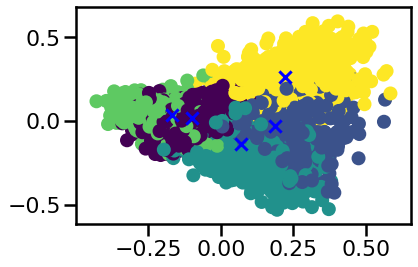

In [374]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [ ]:
def get_nouns_adjs(words):
    """This pulls out any nouns + adjs in the words"""
    nouns_adjs = []
    tags = ['NN', 'NNP', 'NNPS', 'NNS', 'JJ', 'JJS']
    doc = nlp(words)
    for word in doc:
        if word.tag_ in tags and word.text not in stop and letters_only(word.text):
            nouns_adjs.append(word.text)
    return nouns_adjs

In [399]:
df.head()

,name,ingredients,total_time,avg_rating,ings_cleaned,ings_str,ings_str1,cleaned_ings,text,final,txt,calories_g,fat_g,carbohydrates_g,protein_g,cholesterol_mg,sodium_mg,try,finally
0,World's Best Lasagna,"['1 pound sweet Italian sausage', '3/4 pound lean ground beef', '1/2 cup minced onion', '2 cloves garlic, crushed', '1 (28 ounce) can crushed tomatoes', '2 (6 ounce) cans tomato paste', '2 (6.5 ounce) cans canned tomato sauce', '1/2 cup water', '2 tablespoons white sugar', '1 1/2 teaspoons dried basil leaves', '1/2 teaspoon fennel seeds', '1 teaspoon Italian seasoning', '1 1/2 teaspoons salt, divided, or to taste', '1/4 teaspoon ground black pepper', '4 tablespoons chopped fresh parsley', '12 lasagna noodles', '16 ounces ricotta cheese', '1 egg', '3/4 pound mozzarella cheese, sliced', '3/4 cup grated Parmesan cheese']",195.0,4.80,"['sweet Italian sausage', 'lean ground beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",sweet Italian sausage lean ground beef onion garlic tomatoes tomato paste tomato sauce water white sugar basil leaves fennel seeds Italian seasoning black pepper parsley lasagna noodles ricotta cheese eggs mozzarella cheese Parmesan cheese,"sweet Italian sausage, lean ground beef, onion, garlic, tomatoes, tomato paste, tomato sauce, water, white sugar, basil leaves, fennel seeds, Italian seasoning, black pepper, parsley, lasagna noodles, ricotta cheese, eggs, mozzarella cheese, Parmesan cheese","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",italian sausage beef onion garlic tomatoes tomato paste tomato sauce water white sugar basil leave fennel seed italian season black pepper parsley lasagna noodles ricotta cheese egg mozzarella cheese parmesan cheese,"['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leave', 'fennel seed', 'italian season', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'egg', 'mozzarella cheese', 'parmesan cheese']",448.0,21.3,36.5,29.7,82,1400.0,"['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']"
1,Pork Chops in Garlic Mushroom Sauce,"['2 pounds boneless pork chops', '1/2 teaspoon paprika', '1 pinch kosher salt and ground black pepper to taste', '1/4 cup butter, divided', '1 (8 ounce) package sliced fresh mushrooms', '4 cloves garlic, minced', '1 teaspoon Dijon mustard', '2 tablespoons all-purpose flour', '2 cups beef broth']",30.0,4.61,"['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'all-purpose flour', 'beef broth']",pork chops paprika butter mushrooms garlic Dijon mustard all-purpose flour beef broth,"pork chops, paprika, butter, mushrooms, garlic, Dijon mustard, all-purpose flour, beef broth","['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon

In [398]:
raw_df.head()

,name,ingredients,total_time,avg_rating,ings_cleaned,cleaned_ings,calories_g,fat_g,carbohydrates_g,protein_g,cholesterol_mg,sodium_mg,recipe_id
0,World's Best Lasagna,"['1 pound sweet Italian sausage', '3/4 pound lean ground beef', '1/2 cup minced onion', '2 cloves garlic, crushed', '1 (28 ounce) can crushed tomatoes', '2 (6 ounce) cans tomato paste', '2 (6.5 ounce) cans canned tomato sauce', '1/2 cup water', '2 tablespoons white sugar', '1 1/2 teaspoons dried basil leaves', '1/2 teaspoon fennel seeds', '1 teaspoon Italian seasoning', '1 1/2 teaspoons salt, divided, or to taste', '1/4 teaspoon ground black pepper', '4 tablespoons chopped fresh parsley', '12 lasagna noodles', '16 ounces ricotta cheese', '1 egg', '3/4 pound mozzarella cheese, sliced', '3/4 cup grated Parmesan cheese']",195.0,4.80,"['sweet Italian sausage', 'lean ground beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']","['Italian sausage', 'beef', 'onion', 'garlic', 'tomatoes', 'tomato paste', 'tomato sauce', 'water', 'white sugar', 'basil leaves', 'fennel seeds', 'Italian seasoning', 'black pepper', 'parsley', 'lasagna noodles', 'ricotta cheese', 'eggs', 'mozzarella cheese', 'Parmesan cheese']",448.0,21.3,36.5,29.7,82,1400.0,0
1,Pork Chops in Garlic Mushroom Sauce,"['2 pounds boneless pork chops', '1/2 teaspoon paprika', '1 pinch kosher salt and ground black pepper to taste', '1/4 cup butter, divided', '1 (8 ounce) package sliced fresh mushrooms', '4 cloves garlic, minced', '1 teaspoon Dijon mustard', '2 tablespoons all-purpose flour', '2 cups beef broth']",30.0,4.61,"['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'all-purpose flour', 'beef broth']","['pork chops', 'paprika', 'butter', 'mushrooms', 'garlic', 'Dijon mustard', 'flour', 'beef broth']",199.0,13.4,3.1,16.3,54,333.0,1
2,Super Duper Slow Cooker Beef Stroganoff,"['1 1/2 pounds cubed beef stew meat', 'salt and ground black pepper to taste', '1 onion, chopped', '1 (10.75 ounce) can condensed cream of mushroom soup', '1/4 cup water', '1 tablespoon dried chives', '2 cloves garlic, minced', '1 tablespoon Worcestershire sauce', '1 cube beef bouillon', '1/2 cup red wine', '1 tablespoon cornstarch', '1 tablespoon all-purpose flour', '1 (8 ounce) container sour cream', '1 (8 ounce) package sliced fresh mushrooms', '4 ounces cream cheese', '1/2 cup chopped fresh parsley']",435.0,4.63,"['beef stew meat', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'all-purpose flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']","['beef', 'onion', 'cream of mushroom soup', 'water', 'chives', 'garlic', 'Worcestershire sauce', 'beef bouillon', 'wine', 'cornstarch', 'flour', 'sour cream', 'mushrooms', 'cream cheese', 'parsley']",394.0,24.2,14.3,26.3,97,629.0,2
3,Chef John's Perfect Prime Rib,"['4 pounds prime rib roast', '1/4 cup unsalted butter, softened', '1 tablespoon freshly ground black pepper', '1 teaspoon herbes de Provence', 'kosher salt']",390.0,4.77,"['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']","['prime rib roast', 'butter', 'black pepper', 'herbes de Provence']",1757.0,160.6,1.0,72.5,362,343.0,3
4,Beef Stroganoff for Instant Pot®,"['2 tablespoons canola oil', '1/2 onion, diced', '2 teaspoons salt, divided', '2 pounds beef stew meat, cut into 1-inch cubes', '1 teaspoon freshly ground black pepper', '3 cloves garlic, minced', '1/2 teaspoon dried thyme', '2 tablespoons soy sauce', '3 cups chopped mushrooms', '2 tablespoons all-purpose flour', '3 cups chicken broth', '1 (16 ounce) package wide egg noodles', '3/4 cup sour cream, or to taste']",62.0,4.46,"['canola oil', 'onion', 'beef stew meat', 'black pepper', 'garlic', 'thyme', 'soy sauce', 'mushrooms', 'all-purpose flour', 'c

In [400]:
stopwords_list = stopwords.words('english')
vectorizer = TfidfVectorizer(analyzer='word')
#build recipe-ingredient tfidf matrix
tfidf_matrix = vectorizer.fit_transform(df['text'])